### Salman Rashid K V - DSML October Batch

# Business Case: Netflix - Data Exploration and Visualisation

### Business Problem

Analyze the data and generate insights that could help Netflix team deciding which type 
of shows/movies to produce and how they can grow the business in different countries.

### Problem Statement
- Study the data set for data cleaning and preprocessing
- Type of content is available in different countries
- Comparison of TV shows vs Movies 
- Analysis of actors/directors of different shows/movies
- Analysis of different genres available on netflix
- Understanding what content is available in different countries
- Does Netflix has more focus on TV Shows than movies in recent years
- Best time to launch a TV show in different countries
- Study different combinations of columns available in the data
- Analyse the relation between date and release of movies/TV shows

## Data Information

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Netflix.txt')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### The Data Frame have 12 columns :
- Show_id: Unique ID for every Movie / TV Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / TV Show
- Director: Director of the Movie / TV Show
- Cast: Actors involved in the Movie / TV Show
- Country: Country where the Movie / TV Show was produced
- Date_added: Date Movie / TV Show was added on Netflix
- Release_year: Actual Release year of the Movie / TV Show
- Rating: TV Rating of the Movie / TV Show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

In [4]:
df.shape

(8807, 12)

- The data frame have 8807 rows and 12 columns

In [5]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

- Datatype of each columns are displayed. The type of 'date added' column need to be converted from object to 'datetime' format

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- Reveals the existence of null values in columns director, cast, country, date added and rating. These need to be managed before data analysis.

In [8]:
df['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [9]:
df['title'].nunique()

8807

In [10]:
df['title'].duplicated().sum()

0

- There are 8807 titles in as much rows. Which means it doesnot have any duplicate values.

In [11]:
df.release_year.unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [12]:
df['release_year'].nunique()

74

- There are a total of 74 unique years from 1925 to 2021.

In [13]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


First movie is released in 1925
- 25 percent of the movies are made in between 1925 and 2013
- 50 percent of the movies are made in between 1925 and 2017
- Remaining 50 percent of the movies are made from 2017 to 2021

In [14]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

- There is an occurance of three values from duration in the ratings column.

### Managing the TV rating column

In [15]:
df_c=df.copy()
df_c.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df_c.loc[df['rating'].str.contains('min',na=False),'rating']='UR'
df_c.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


- The occurence of the duration values in the rating column is replaced with UR, which means unrated.

In [17]:
df_c.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
UR             6
TV-Y7-FV       6
NC-17          3
Name: rating, dtype: int64

- Rating column data is presented in American TV rating format. So, we need to change it into an accessible format.

In [18]:
df_c['rating']=df_c['rating'].replace({'PG-13':'PG-13 : Teens',
                                       'PG':'PG : Older Kids',
                                       'TV-MA':'TV-MA : Adults',
                                       'TV-14':'TV-14 : Teens',
                                       'TV-PG':'TV-PG : Older Kids',
                                       'TV-Y':'TV-Y : Kids',
                                       'TV-Y7':'TV-Y7 : Older Kids',
                                       'R':'R : Adults',
                                       'NC-17':'NC-17 : Adults', 
                                       'TV-G':'TV-G : Kids',
                                       'TV-Y7-FV':'TV-Y7-FV : Older Kids',
                                       'NR':'NR : Adults',
                                       'G':'G : Kids',
                                       'UR':'UR : Adults'})
df_c.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13 : Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA : Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA : Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA : Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA : Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
df_c.rating.value_counts().reset_index()

,index,rating
0,TV-MA : Adults,3207
1,TV-14 : Teens,2160
2,TV-PG : Older Kids,863
3,R : Adults,799
4,PG-13 : Teens,490
5,TV-Y7 : Older Kids,334
6,TV-Y : Kids,307
7,PG : Older Kids,287
8,TV-G : Kids,220
9,NR : Adults,80


- The rating column is managed so that it is easly accessible to every users around the world. The number of occurence of rating for movies and TV shows are is looked.

In [20]:
kids=df_c[(df_c['rating']=='PG : Older Kids')|(df_c['rating']=='TV-Y7-FV : Older Kids')|(df_c['rating']=='TV-Y : Kids')| (df_c['rating']=='PG : Older Kids') | (df_c['rating']=='TV-G : Kids')|(df_c['rating']=='G : Kids')]
kids_num=kids['title'].nunique()
kids_num

861

In [21]:
teens=df_c[(df_c['rating']=='TV-14 : Teens')|(df_c['rating']=='TV-PG : Older Kids')|(df_c['rating']=='PG-13 : Teens')]
teens_num=teens['title'].nunique()
teens_num

3513

In [22]:
adults=df_c[(df_c['rating']=='TV-MA : Adults')|(df_c['rating']=='R : Adults')|(df_c['rating']=='NR : Adults')|(df_c['rating']=='UR : Adults')|(df_c['rating']=='NC-17 : Adults')]
adults_num=adults['title'].nunique()
adults_num

4095

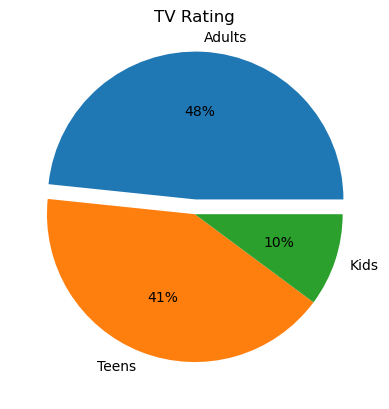

In [23]:
plt.pie([adults_num,teens_num,kids_num],labels=['Adults','Teens','Kids'],explode=(0.1,0,0),autopct='%0.f%%')
plt.title('TV Rating')
plt.show()


Most content available on Netflix were targeted towards Adults
It contain 
- 4095 shows for adults (48%)
- 3513 shows for teens (41%)
and only 
- 861 shows for kids (10%)

## Null Values

In [24]:
df_c.isnull().values.any()

True

In [25]:
df_c.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

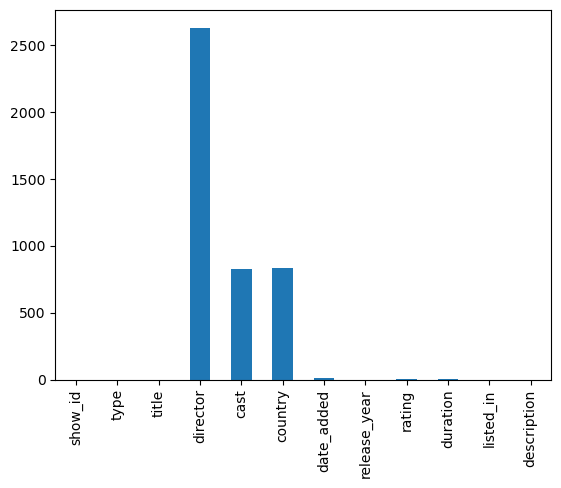

In [26]:
df_c.isnull().sum().plot.bar()
plt.show()

- The dataframe have null values in columns director, cast, country, date added, rating and duration

## Managing null values in the dataframe

First we need to un-nest the values in each columns

3 steps to un-nest and manage the null values are :
- Splitting Stacking
- Merging the columns
- Replacing null values


#### Director

In [27]:
df_c.director.reset_index().head(10)

,index,director
0,0,Kirsten Johnson
1,1,NaN
2,2,Julien Leclercq
3,3,NaN
4,4,NaN
5,5,Mike Flanagan
6,6,"Robert Cullen, José Luis Ucha"
7,7,Haile Gerima
8,8,Andy Devonshire
9,9,Theodore Melfi


#### Splitting and Stacking

In [186]:
unlist=df_c['director'].apply(lambda x: str(x).split(',' )).to_list()
df_new=pd.DataFrame(unlist,index=df['title'])
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [30]:
df_new=df_new.stack()
df_new

title                   
Dick Johnson Is Dead   0    Kirsten Johnson
Blood & Water          0                nan
Ganglands              0    Julien Leclercq
Jailbirds New Orleans  0                nan
Kota Factory           0                nan
                                 ...       
Zodiac                 0      David Fincher
Zombie Dumb            0                nan
Zombieland             0    Ruben Fleischer
Zoom                   0       Peter Hewitt
Zubaan                 0        Mozez Singh
Length: 9612, dtype: object

In [31]:
df_new=pd.DataFrame(df_new.reset_index())
df_new

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt


In [32]:
df_new.rename(columns={0:'Directors'},inplace=True)
df_new.drop(['level_1'],axis=1,inplace=True)
df_new.head(10)

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


#### Country

In [33]:
unlist1=df_c['country'].apply(lambda x: str(x).split(',' )).to_list()
df_new1=pd.DataFrame(unlist1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Country'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head(10)

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


#### listed_in

In [34]:
unlist2=df_c['listed_in'].apply(lambda x: str(x).split(',' )).to_list()
df_new2=pd.DataFrame(unlist2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Genre'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head(10)

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


#### cast

In [35]:
unlist3=df_c['cast'].apply(lambda x: str(x).split(',' )).to_list()
df_new3=pd.DataFrame(unlist3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Actors'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head(10)

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


#### Merging the splitted columns

In [36]:
#joining director with actors
df_new4=df_new3.merge(df_new,on=['title'],how='inner')
#joining above data with genre data
df_new5=df_new4.merge(df_new2,on=['title'],how='inner')
#joining above data with country data
df_new6=df_new5.merge(df_new1,on=['title'],how='inner')
df_new6.head(10)

,title,Actors,Directors,Genre,Country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
5,Blood & Water,Khosi Ngema,nan,TV Dramas,South Africa
6,Blood & Water,Khosi Ngema,nan,TV Mysteries,South Africa
7,Blood & Water,Gail Mabalane,nan,International TV Shows,South Africa
8,Blood & Water,Gail Mabalane,nan,TV Dramas,South Africa
9,Blood & Water,Gail Mabalane,nan,TV Mysteries,South Africa


#### Final Merge

In [37]:
df_final=df_new6.merge(df_c[['show_id', 'type','title', 'date_added','release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13 : Teens,90 min
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons


In [38]:
df_final.shape

(202065, 11)

- As you can observe, after stacking and merging the number of rows rocketed from 8807 to more than 2 lakhs.
- The null values in each columns are replaced with proper replacements in the next step.

### Replacing Null Values

In [39]:
#df_new6.replace(['Unknown'],np.nan,inplace=True)
#df_new6['Actors'].fillna('Unknown Actor',inplace=True)
#df_new6['Directors'].fillna('Unknown Director',inplace=True)
#df_new6['Country'].fillna('Unknown Country',inplace=True)
#df_new6.head(10)
df_final['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_final['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df_final['Country'].replace(['nan'],['Unknown Country'],inplace=True)
df_final.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13 : Teens,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons


In [40]:
df_final.isnull().sum()

title             0
Actors            0
Directors         0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [41]:
df_final.nunique()

title            8807
Actors          39297
Directors        5121
Genre              73
Country           198
show_id          8807
type                2
date_added       1767
release_year       74
rating             14
duration          220
dtype: int64

- There are 198 unique countries that release movies / TV shows around the world.
- There are 39297 unique actors who appear in different movies / TV shows around the world.
- There are 5121 unique directors for movies / TV shows around the world.
- There are 73 unique movies / TV shows genres around the world.
- The movies / TV shows are catogorized based on 14 unique TV ratings.

### Converting datatype of Date into 'datetime'

In [42]:
df_date=df_final.copy()

In [43]:
df_date['date_added']=df_date['date_added'].astype("datetime64")
df_date.head(10)

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13 : Teens,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons
5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons
6,Blood & Water,Khosi Ngema,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons
7,Blood & Water,Gail Mabalane,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons
8,Blood & Water,Gail Mabalane,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons
9,Blood & Water,Gail Mabalane,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons


In [44]:
df_date['added_month']=df_date['date_added'].dt.month
df_date['added_week']=df_date['date_added'].dt.week
df_date['added_year']=df_date['date_added'].dt.year
df_date.head()

C:\Users\rrosh\AppData\Local\Temp\ipykernel_7460\1705315229.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_date['added_week']=df_date['date_added'].dt.week


,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,added_month,added_week,added_year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13 : Teens,90 min,9.0,38.0,2021.0
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0


In [45]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         202065 non-null  object        
 1   Actors        202065 non-null  object        
 2   Directors     202065 non-null  object        
 3   Genre         202065 non-null  object        
 4   Country       202065 non-null  object        
 5   show_id       202065 non-null  object        
 6   type          202065 non-null  object        
 7   date_added    201907 non-null  datetime64[ns]
 8   release_year  202065 non-null  int64         
 9   rating        201998 non-null  object        
 10  duration      202062 non-null  object        
 11  added_month   201907 non-null  float64       
 12  added_week    201907 non-null  float64       
 13  added_year    201907 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 

- The datatype for the column 'date_added' is converted from object to datetime format.
- New columns were made namely added_month, added_week & added_year which are float type .

In [46]:
df_date['date_added'].dt.month.value_counts()

7.0     20302
12.0    18266
1.0     18254
9.0     18120
10.0    17796
8.0     17086
4.0     17081
6.0     16659
3.0     15859
11.0    15597
5.0     13827
2.0     13060
Name: date_added, dtype: int64

In [47]:
df_date['date_added'].dt.year.value_counts()

2019.0    46997
2020.0    46051
2021.0    36534
2018.0    35785
2017.0    25209
2016.0     8569
2015.0     1560
2014.0      452
2011.0      438
2013.0      207
2012.0       36
2009.0       30
2010.0       20
2008.0       19
Name: date_added, dtype: int64

In [48]:
df_date['date_added'].dt.week.value_counts().head(10)

C:\Users\rrosh\AppData\Local\Temp\ipykernel_7460\2334317774.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_date['date_added'].dt.week.value_counts().head(10)


1.0     9474
35.0    6993
44.0    6943
26.0    6593
40.0    6267
31.0    6034
9.0     5920
27.0    5785
48.0    5250
13.0    5057
Name: date_added, dtype: int64

In [49]:
df_date_movies=df_date[df_date["type"]=='Movie'].reset_index()
df_date_movies.head(5)

,index,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,added_month,added_week,added_year
0,0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13 : Teens,90 min,9.0,38.0,2021.0
1,159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG : Older Kids,91 min,9.0,38.0,2021.0
2,160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG : Older Kids,91 min,9.0,38.0,2021.0
3,161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG : Older Kids,91 min,9.0,38.0,2021.0
4,162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG : Older Kids,91 min,9.0,38.0,2021.0


In [50]:
df_date_movies[['release_year','added_month','added_week','added_year']].describe()

,release_year,added_month,added_week,added_year
count,145917.000000,145917.000000,145917.000000,145917.000000
mean,2012.130663,6.611450,26.280427,2018.956612
std,9.816535,3.451511,15.097225,1.539319
min,1942.000000,1.000000,1.000000,2008.000000
25%,2010.000000,4.000000,13.000000,2018.000000
50%,2016.000000,7.000000,27.000000,2019.000000
75%,2018.000000,10.000000,39.000000,2020.000000
max,2021.000000,12.000000,53.000000,2021.000000


- First movie added to the platform is in 2008.
- 25% of the movies were added before the year 2018.
- Rest of the movies were added between 2018 and 2021

#### Box Plot between release year and added year to the platform for the movies

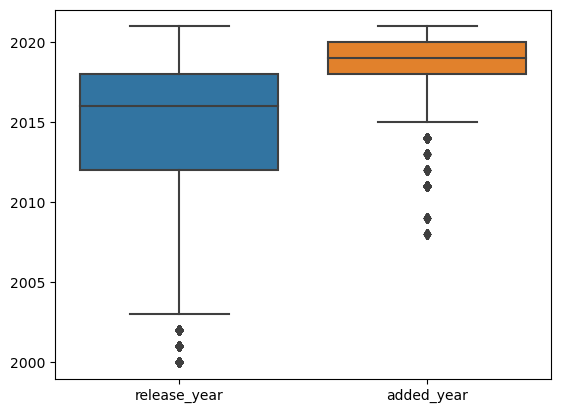

In [51]:
d=df_date_movies[df_date_movies['release_year']>=2000]
sns.boxplot(data = d[['release_year','added_year']])
plt.show()

- Both columns for the movies have some number of outlier values

In [52]:
df_date_tv=df_date[df_date["type"]=='TV Show'].reset_index()
df_date_tv.head(5)

,index,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,added_month,added_week,added_year
0,1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0
1,2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0
2,3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0
3,4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0
4,5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA : Adults,2 Seasons,9.0,38.0,2021.0


In [53]:
df_date_tv[['release_year','added_month','added_week','added_year']].describe()

,release_year,added_month,added_week,added_year
count,56148.000000,55990.000000,55990.000000,55990.000000
mean,2016.874902,6.701947,27.787373,2018.988444
std,5.069625,3.417012,14.876047,1.583131
min,1925.000000,1.000000,1.000000,2008.000000
25%,2016.000000,4.000000,15.000000,2018.000000
50%,2018.000000,7.000000,27.000000,2019.000000
75%,2020.000000,10.000000,40.000000,2020.000000
max,2021.000000,12.000000,53.000000,2021.000000


- First TV show added to the platform is in 2008.
- 25% of the movies were added before the year 2018.
- Rest of the movies were added between 2018 and 2021

#### Box Plot between release year and added year to the platform for the TV shows

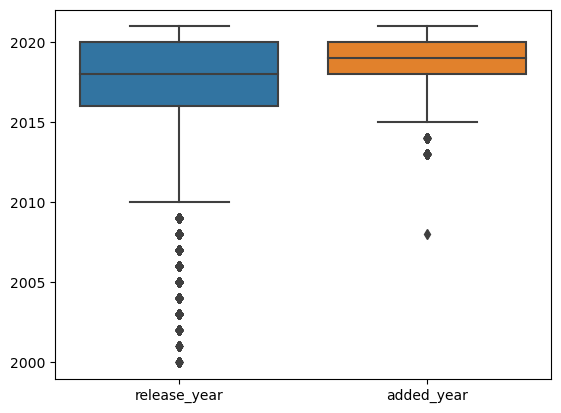

In [54]:
d1=df_date_tv[df_date_tv['release_year']>=2000]
sns.boxplot(data = d1[['release_year','added_year']])
plt.show()

- Both columns for the TV shows have some number of outlier values

### Managing Duration for Movies & TV Shows

### Movies

In [55]:
df_movies=df_final[df_final["type"]=='Movie'].reset_index()
df_movies.head()

,index,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13 : Teens,90 min
1,159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,91 min
2,160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,91 min
3,161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,91 min
4,162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,91 min


In [56]:
df_movies.duration.isnull().sum()

3

- There are occurence of 3 null values in movie duration which can be replaced 'ffill' command as the number of null values are minimal.

In [57]:
df_movies['duration'] = df_movies['duration'].fillna(method='ffill')

In [58]:
df_movies.duration.unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

#### Converting movie duration to integer

In [59]:
df_movies['duration']=df_movies['duration'].str.replace('min','').astype(int)
df_movies.head()

,index,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13 : Teens,90
1,159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,91
2,160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,91
3,161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,91
4,162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,91


In [60]:
df_movies['duration'].describe()

count    145917.000000
mean        106.839758
std          24.709589
min           3.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
Name: duration, dtype: float64

- 50% of movies on Netflix is of duration around 100 mins
- Maximum duration of a movie happened at 312 mins

#### Comparison of movie duration from distplot and boxplot

C:\Users\rrosh\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


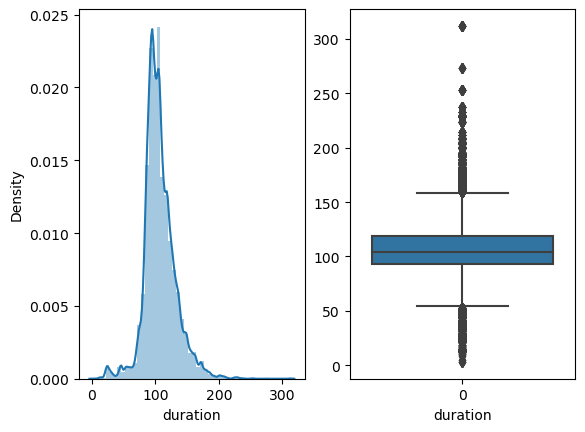

In [61]:
plt.subplot(1, 2, 1)
sns.distplot(df_movies['duration'])

plt.subplot(1, 2, 2)
sns.boxplot(data = df_movies['duration'])
plt.xlabel('duration')

plt.show()

- Data can be intepreted as 50% of movies having duration of around 100 mins.

In [62]:
df_movies.duration.min()

3

In [63]:
df_movies.duration.max()

312

In [64]:
df_movies['duration'] = pd.cut(df_movies['duration'],bins=[0,60,90,120,150,180,240,320],
                               labels=['0-60','60-90','90-120','120-150','150-180','180-240','240-320'])
df_movies.head(10)

,index,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13 : Teens,60-90
1,159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120
2,160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120
3,161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120
4,162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120
5,163,My Little Pony: A New Generation,James Marsden,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120
6,164,My Little Pony: A New Generation,James Marsden,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120
7,165,My Little Pony: A New Generation,Sofia Carson,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120
8,166,My Little Pony: A New Generation,Sofia Carson,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120
9,167,My Little Pony: A New Generation,Liza Koshy,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,"September 24, 2021",2021,PG : Older Kids,90-120


In [65]:
df_movies.duration.value_counts()

90-120     81659
120-150    26691
60-90      26555
150-180     5871
0-60        3751
180-240     1347
240-320       43
Name: duration, dtype: int64

- Duration of movies are converted into bins or set of durations inorder to classify them better

### TV Shows

In [66]:
df_tvshow=df_final[df_final["type"]=='TV Show'].reset_index()
df_tvshow.head()

,index,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
1,2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
2,3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
3,4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons
4,5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA : Adults,2 Seasons


In [67]:
df_tvshow.duration.unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [68]:
df_tvshow['duration'].describe()

count        56148
unique          15
top       1 Season
freq         35035
Name: duration, dtype: object

In [69]:
df_tvshow['duration'].value_counts()

1 Season      35035
2 Seasons      9559
3 Seasons      5084
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

- Majority of producers have only released few seasons of TV shows.

#### Number of movies & TV shows added to the platform

In [70]:
df_num=df_final.groupby(['type']).aggregate({'title':'nunique'}).reset_index()
df_num

,type,title
0,Movie,6131
1,TV Show,2676


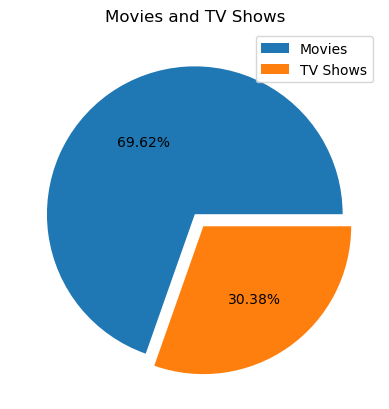

In [71]:
df_num=df_final.groupby(['type']).aggregate({'title':'nunique'}).reset_index()
plt.pie(df_num['title'],explode=(0,0.1),autopct='%.2f%%')
plt.title('Movies and TV Shows')
plt.legend(['Movies','TV Shows'])
plt.show()

- There are 6131 movies which comes around 70% of total shows produced and the remaining 30% are TV shows.
- Majority of the shows produced are movies.

### Visual Analysis for Movies

### Analysis of actors in movies

In [72]:
df_actors_movies=df_movies.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index()
df_actors_movies

,Actors,title
0,Jr.,1
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2Mex,1
4,50 Cent,4
...,...,...
27875,Çetin Tekindor,1
27876,Úrsula Corberó,1
27877,İbrahim Büyükak,1
27878,Şahin Irmak,1


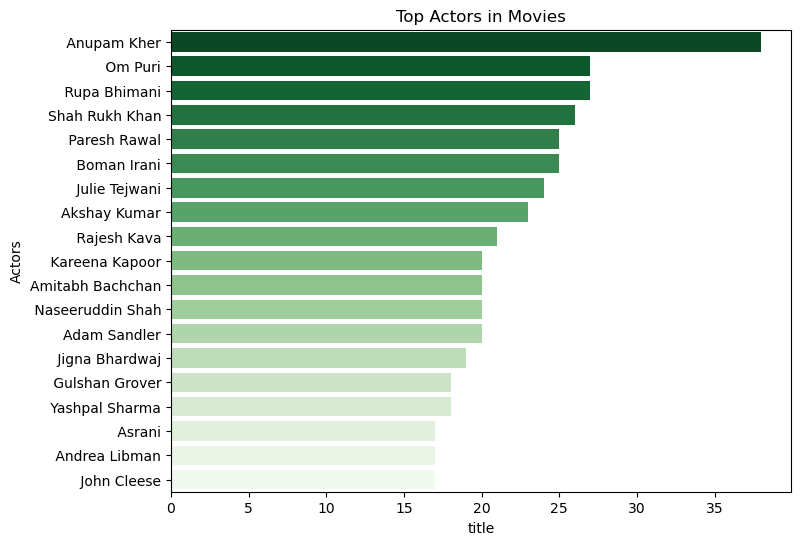

In [73]:
df_actors_movies=df_movies.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:20]
df_actors_movies=df_actors_movies[df_actors_movies['Actors']!='Unknown Actor']
plt.figure(figsize=(8,6))
plt.title('Top Actors in Movies')
sns.barplot(data=df_actors_movies,x='title',y='Actors', palette="Greens_r")
plt.show()

- Anupam Kher, Om Puri, Rupa Bhimani, SRK and Paresh Rawal are the top 5 popular actors on Netflix.

### Analysis of directors in movies

In [74]:
df_director_movies=df_movies.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index()
df_director_movies

,Directors,title
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
4882,Çagan Irmak,1
4883,Ísold Uggadóttir,1
4884,Óskar Thór Axelsson,1
4885,Ömer Faruk Sorak,2


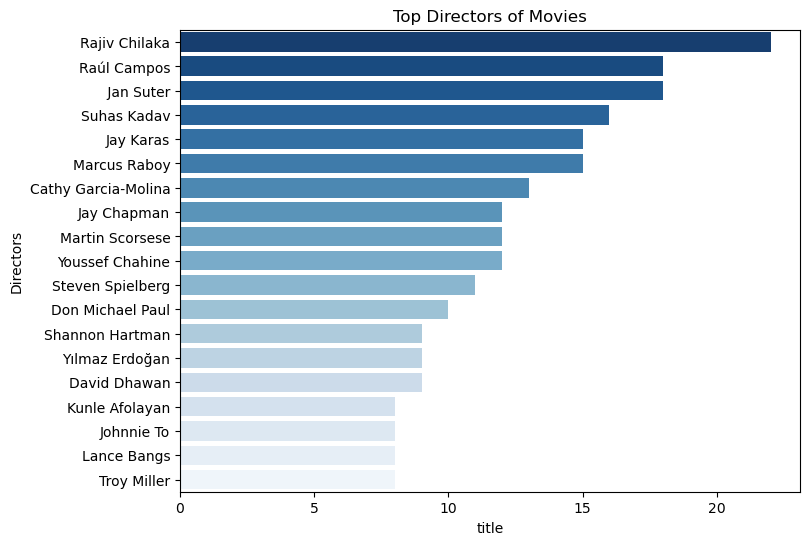

In [75]:
df_director_movies=df_movies.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:20]
df_director_movies=df_director_movies[df_director_movies['Directors']!='Unknown Director']
plt.figure(figsize=(8,6))
plt.title('Top Directors of Movies')
sns.barplot(data=df_director_movies,x='title',y='Directors',palette="Blues_r")
plt.show()

- Rajiv Chilaka, Raul Campos, Jan Suter, Suhas Kadav and Jay Karas are top 5 popular directors on Netflix

### Analysis of different genre for movies

In [76]:
df_genre_movies=df_movies.groupby(['Genre']).aggregate({'title':'nunique'}).sort_values(by=['title'], ascending=False).reset_index()
df_genre_movies.head(10)

,Genre,title
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
5,Dramas,827
6,Independent Movies,736
7,Romantic Movies,613
8,Children & Family Movies,605
9,Thrillers,512


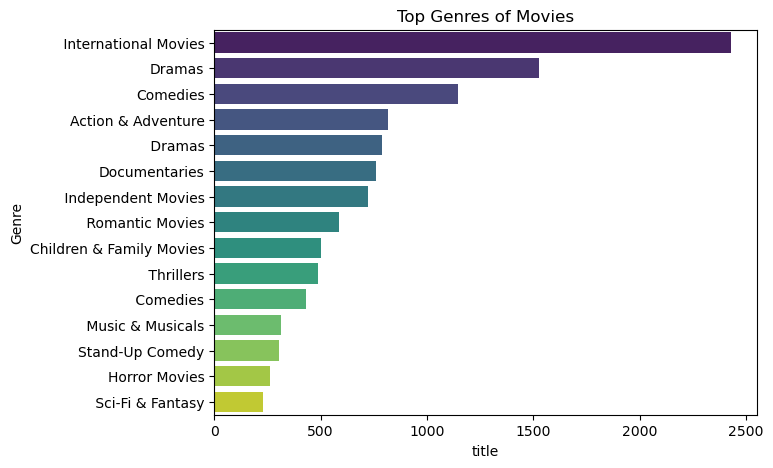

In [184]:
df_genre_movies=df_movies.groupby(['Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:15]
plt.figure(figsize=(7,5))
plt.title('Top Genres of Movies')
sns.barplot(data=df_genre_movies,x='title',y='Genre',palette="viridis")
plt.show()

- International Movies, Dramas, Comedies, Action/Adventure and Documentaries are top 5 movie genre on Netflix

### Analysis of movies from each country

In [78]:
df_country_movies=df_movies.groupby(['Country']).aggregate({'title':'nunique'}).sort_values(by=['title'], ascending=False).reset_index()
df_country_movies

,Country,title
0,United States,2364
1,India,927
2,Unknown Country,440
3,United States,388
4,United Kingdom,382
...,...,...
183,Jamaica,1
184,Mauritius,1
185,Mozambique,1
186,Namibia,1


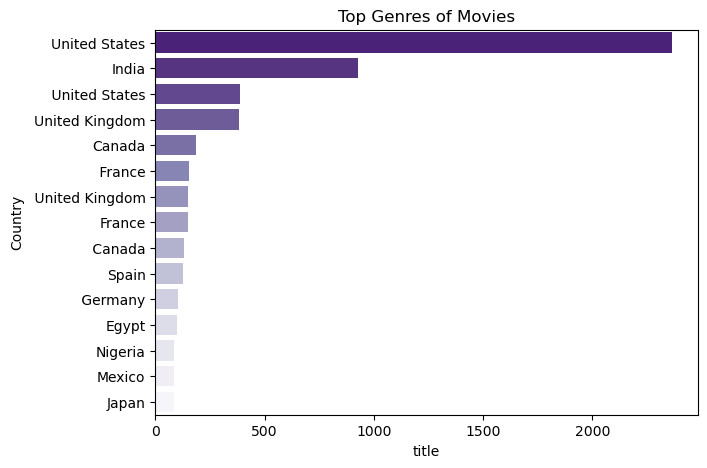

In [183]:
df_country_movies=df_movies.groupby(['Country']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_country_movies=df_country_movies[df_country_movies['Country']!='Unknown Country']
plt.figure(figsize=(7,5))
plt.title('Top Genres of Movies')
sns.barplot(data=df_country_movies,x='title',y='Country',palette="Purples_r")
plt.show()

- United States, India and UK are the top 3 countries on Netflix based on putting out new movies

### Analysis of TV Rating for movies

In [80]:
df_movies['rating'].unique()

array(['PG-13 : Teens', 'PG : Older Kids', 'TV-MA : Adults',
       'TV-PG : Older Kids', 'TV-14 : Teens', 'TV-Y : Kids', 'R : Adults',
       'TV-G : Kids', 'TV-Y7 : Older Kids', 'G : Kids', 'NC-17 : Adults',
       'UR : Adults', 'NR : Adults', nan, 'TV-Y7-FV : Older Kids'],
      dtype=object)

In [81]:
df_rating_movies=df_movies.groupby(['rating']).aggregate({'title':'nunique'}).sort_values(by=['title'], ascending=False)
df_rating_movies

,title
rating,
TV-MA : Adults,2062
TV-14 : Teens,1427
R : Adults,797
TV-PG : Older Kids,540
PG-13 : Teens,490
PG : Older Kids,287
TV-Y7 : Older Kids,139
TV-Y : Kids,131
TV-G : Kids,126


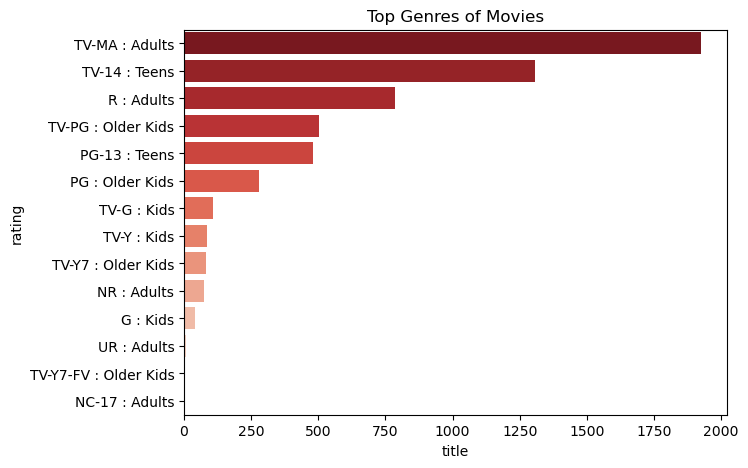

In [182]:
df_rating_movies=df_movies.groupby(['rating']).aggregate({'title':'nunique'}).sort_values(by=['title'], ascending=False).reset_index()
plt.figure(figsize=(7,5))
plt.title('Top Genres of Movies')
sns.barplot(data=df_rating_movies,x='title',y='rating',palette="Reds_r")
plt.show()

- Most of the content on Netflix are rated for Mature Audiences, content not intended for audience under 14 and those which require Parental Guidance.

### Analysis of Duration for movies

In [83]:
df_duration_movies=df_movies.groupby(['duration']).aggregate({"title":"nunique"}).reset_index()
df_duration_movies

,duration,title
0,0-60,488
1,60-90,1505
2,90-120,2996
3,120-150,897
4,150-180,198
5,180-240,44
6,240-320,3


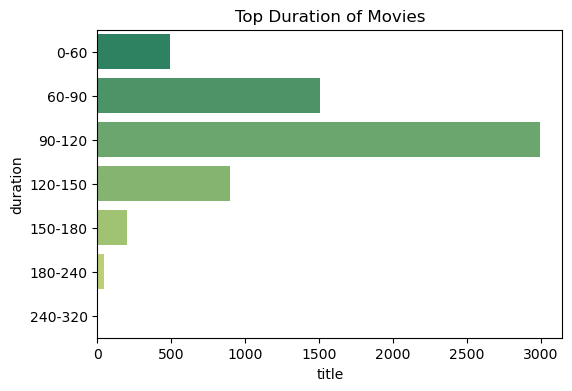

In [84]:
df_duration_movies=df_movies.groupby(['duration']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(6,4))
plt.title('Top Duration of Movies')
sns.barplot(data=df_duration_movies,x='title',y='duration',palette="summer")
plt.show()


- Most Watched movies on Netflix is having duration between 90 and 120 mins.

### Analysis of movies added across the years

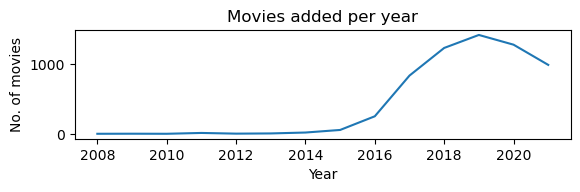

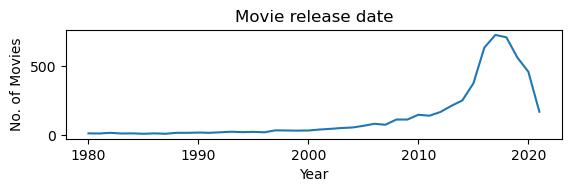

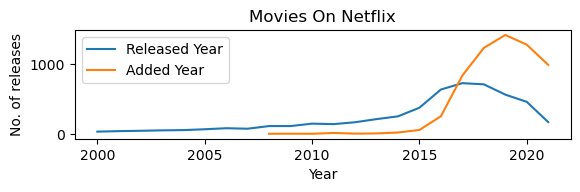

In [181]:
# Movies added in a year

plt.subplot(3, 1, 1)
df_year_movies=df_date_movies.groupby(['added_year']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
sns.lineplot(data=df_year_movies, x='added_year', y='title')
plt.title('Movies added per year')
plt.ylabel("No. of movies")
plt.xlabel("Year")
plt.show()

# Actual release date of movies

plt.subplot(3, 1, 2)
df_release_movie=df_movies.groupby(['release_year']).aggregate({'title':'nunique'}).reset_index()
df_release_movie=df_release_movie[df_release_movie['release_year']>=1980]
sns.lineplot(data=df_release_movie, x='release_year', y='title')
plt.title('Movie release date')
plt.ylabel('No. of Movies')
plt.xlabel('Year')
plt.show()

# Movies On Netflix
plt.subplot(3, 1, 3)
df_release_movie=df_release_movie[df_release_movie['release_year']>=2000]
sns.lineplot(data=df_release_movie, x='release_year', y='title')
sns.lineplot(data=df_year_movies, x='added_year', y='title')
plt.title('Movies On Netflix')
plt.legend(['Released Year','Added Year'])
plt.ylabel('No. of releases')
plt.xlabel('Year')
plt.show()

- The Amount of movies added across Netflix has increased from 2008 coonsistently till 2019. Then started declining.
- Same trend is followed by the actual release date of the movies.

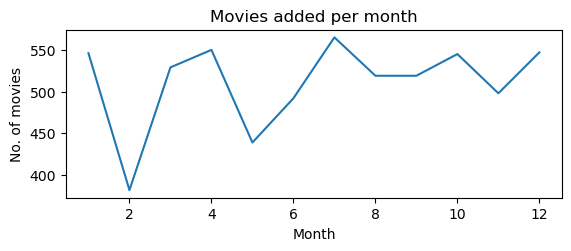

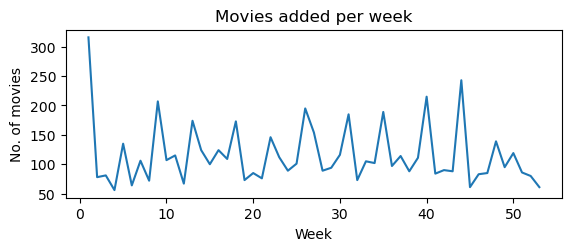

In [86]:
# Movies added per month

plt.subplot(2,1,1)
df_month_movies=df_date_movies.groupby(['added_month']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
sns.lineplot(data=df_month_movies, x='added_month', y='title')
plt.title('Movies added per month')
plt.ylabel("No. of movies")
plt.xlabel("Month")
plt.show()

# Movies added per week

plt.subplot(2,1,2)
df_week_movies=df_date_movies.groupby(['added_week']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
sns.lineplot(data=df_week_movies, x='added_week', y='title')
plt.title('Movies added per week')
plt.ylabel("No. of movies")
plt.xlabel("Week")
plt.show()

- Most of the movies are added in the first and last months across Netflix. It also peaked during the month of July
- Most of the movies are added on Netflix in the first week of the year and it follows a zig zag pattern

### Relation between directors and actors for movies

In [87]:
df_movies_director_actor=df_movies.groupby(['Directors','Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_movies_directors_actors=df_movies_director_actor[df_movies_director_actor['Directors']!='Unknown Director']
df_movies_directors_actors=df_movies_directors_actors[df_movies_directors_actors['Actors']!='Unknown Director']
df_movies_directors_actors

,Directors,Actors,title
35624,Rajiv Chilaka,Rajesh Kava,19
35620,Rajiv Chilaka,Julie Tejwani,19
35625,Rajiv Chilaka,Rupa Bhimani,18
35619,Rajiv Chilaka,Jigna Bhardwaj,18
35636,Rajiv Chilaka,Vatsal Dubey,16
...,...,...,...
16050,Esteban Vidal,Alessandra Denegri,1
16051,Esteban Vidal,Andrés Rillón,1
16052,Esteban Vidal,Delfina Guzmán,1
16053,Esteban Vidal,Felipe Avello,1


In [88]:
df_movies_directors_actors['Actors combined with Directors'] = df_movies_directors_actors.Actors.str.cat(df_movies_directors_actors.Directors, sep=' - ')
df_movies_directors_actors.head(15)

,Directors,Actors,title,Actors combined with Directors
35624,Rajiv Chilaka,Rajesh Kava,19,Rajesh Kava - Rajiv Chilaka
35620,Rajiv Chilaka,Julie Tejwani,19,Julie Tejwani - Rajiv Chilaka
35625,Rajiv Chilaka,Rupa Bhimani,18,Rupa Bhimani - Rajiv Chilaka
35619,Rajiv Chilaka,Jigna Bhardwaj,18,Jigna Bhardwaj - Rajiv Chilaka
35636,Rajiv Chilaka,Vatsal Dubey,16,Vatsal Dubey - Rajiv Chilaka
35622,Rajiv Chilaka,Mousam,13,Mousam - Rajiv Chilaka
35629,Rajiv Chilaka,Swapnil,13,Swapnil - Rajiv Chilaka
42435,Suhas Kadav,Saurav Chakraborty,8,Saurav Chakraborty - Suhas Kadav
44324,Toshiya Shinohara,Koji Tsujitani,7,Koji Tsujitani - Toshiya Shinohara
38623,S.S. Rajamouli,Ramya Krishnan,7,Ramya Krishnan - S.S. Rajamouli


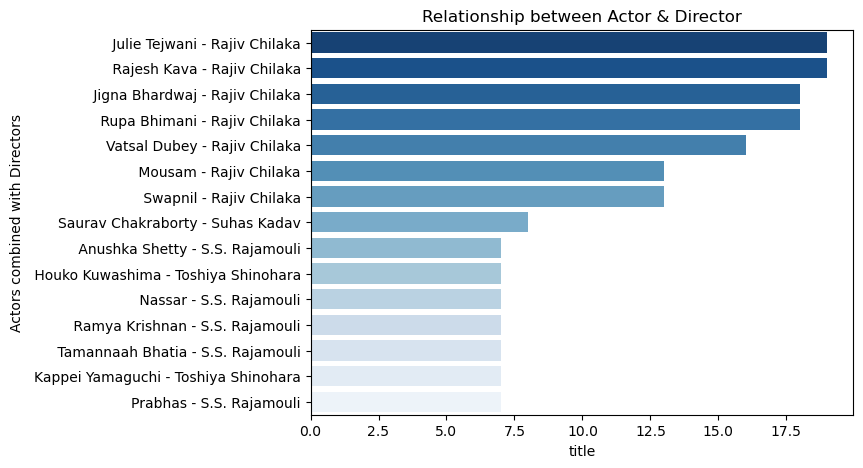

In [178]:
df_movies_directors_actors=df_movies_directors_actors.groupby(['Actors combined with Directors']).aggregate({"title":"sum"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(7,5))
plt.title('Relationship between Actor & Director')
sns.barplot(data=df_movies_directors_actors,x='title',y='Actors combined with Directors',palette="Blues_r")
plt.show()

Top 5 Popular Actor Director Combination in Movies Across Netflix are :
- Julie Tejwani - Rajiv Chilaka
- Rajesh Kava - Rajiv Chilaka
- Jigna Bhardwaj - Rajiv Chilaka
- Rupa Bhimani - Rajiv Chilaka
- Vatsal Dubey - Rajiv Chilaka

### Relation between released year and duration for movies

In [90]:
df_movie_Ryear_duration=df_movies.groupby(['duration','release_year']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_movie_Ryear_duration.head(15)

,duration,release_year,title
215,90-120,2018,377
214,90-120,2017,364
213,90-120,2016,352
216,90-120,2019,298
217,90-120,2020,247
141,60-90,2017,234
142,60-90,2018,220
140,60-90,2016,196
212,90-120,2015,190
143,60-90,2019,184


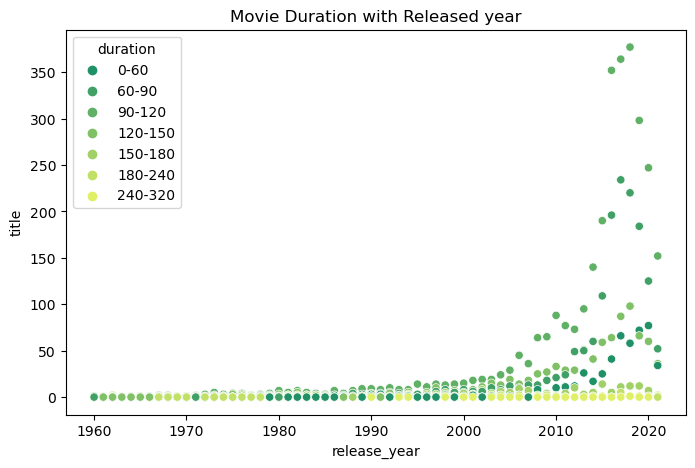

In [91]:
df_movie_Ryear_duration=df_movie_Ryear_duration[df_movie_Ryear_duration['release_year']>=1960]
plt.figure(figsize=(8,5))
sns.scatterplot(x ='release_year', y ='title', data= df_movie_Ryear_duration, hue='duration',palette="summer")
plt.title('Movie Duration with Released year')
plt.show()

- Number of movie release increased abruptly in the last 2 decades
- Most number of movies across Netflix has the duration around 90 - 120 mins

### Relation between country and genre for movies

In [92]:
df_movies_country_genre=df_movies.groupby(['Country','Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_movies_country_genre=df_movies_country_genre[df_movies_country_genre['Country']!='Unknown Country']
df_movies_country_genre.head(15)

,Country,Genre,title
1051,India,International Movies,807
1564,United States,Dramas,429
1563,United States,Documentaries,429
1064,India,Dramas,404
1561,United States,Comedies,374
1557,United States,Action & Adventure,323
1559,United States,Children & Family Movies,320
1548,United States,Independent Movies,318
1061,India,Comedies,267
1545,United States,Dramas,245


In [93]:
df_movies_country_genre['Country with Favorite Genre'] = df_movies_country_genre.Country.str.cat(df_movies_country_genre.Genre, sep=' - ')
df_movies_country_genre.head(15)

,Country,Genre,title,Country with Favorite Genre
1051,India,International Movies,807,India - International Movies
1564,United States,Dramas,429,United States - Dramas
1563,United States,Documentaries,429,United States - Documentaries
1064,India,Dramas,404,India - Dramas
1561,United States,Comedies,374,United States - Comedies
1557,United States,Action & Adventure,323,United States - Action & Adventure
1559,United States,Children & Family Movies,320,United States - Children & Family Movies
1548,United States,Independent Movies,318,United States - Independent Movies
1061,India,Comedies,267,India - Comedies
1545,United States,Dramas,245,United States - Dramas


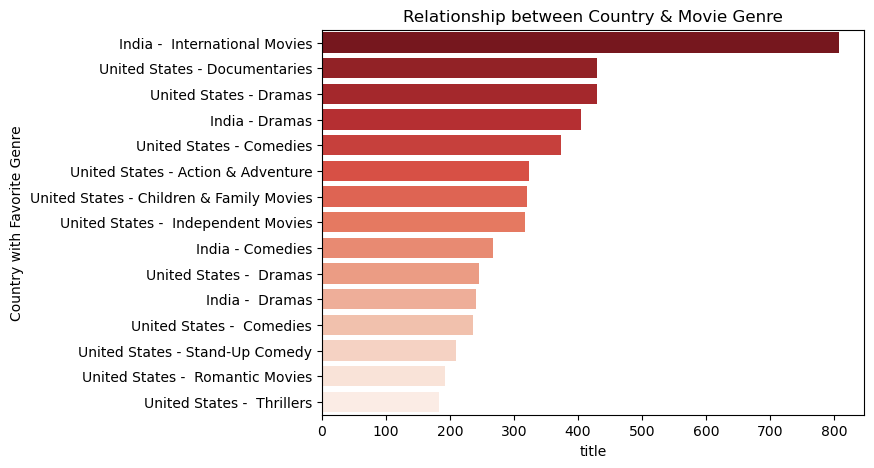

In [177]:
df_movies_country_genre=df_movies_country_genre.groupby(['Country with Favorite Genre']).aggregate({"title":"sum"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(7,5))
plt.title('Relationship between Country & Movie Genre')
sns.barplot(data=df_movies_country_genre,x='title',y='Country with Favorite Genre',palette="Reds_r")
plt.show()

Most number of movies are released in India & USA
In India
- International Movies
- Dramas
- Comedies
, are the top 3 popular genres

In USA
- Documentaries
- Dramas
- Comedies
, are the top 3 popular genres


### Relation between TV rating and released year for movies

In [95]:
df_movies_Ryear_rating=df_movies.groupby(['release_year','rating']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_movies_Ryear_rating.head(15)

,release_year,rating,title
374,2018,TV-MA : Adults,358
361,2017,TV-MA : Adults,337
385,2019,TV-MA : Adults,286
348,2016,TV-MA : Adults,273
395,2020,TV-MA : Adults,220
359,2017,TV-14 : Teens,182
372,2018,TV-14 : Teens,176
383,2019,TV-14 : Teens,160
346,2016,TV-14 : Teens,140
336,2015,TV-MA : Adults,135


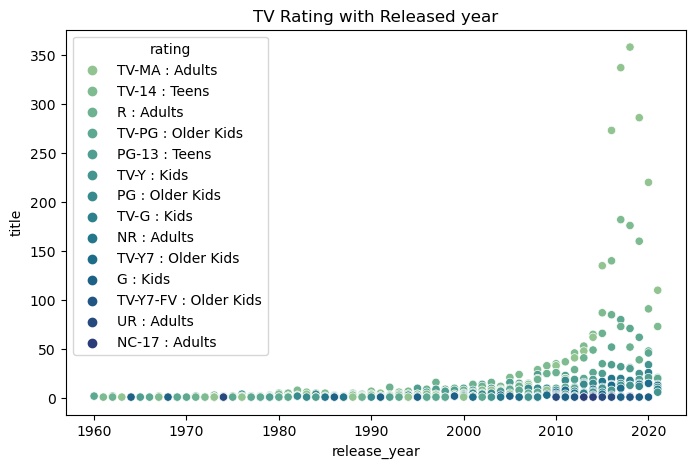

In [96]:
df_movies_Ryear_rating=df_movies_Ryear_rating[df_movies_Ryear_rating['release_year']>=1960]
plt.figure(figsize=(8,5))
sns.scatterplot(x ='release_year', y ='title' , data= df_movies_Ryear_rating, hue='rating',palette="crest")
plt.title('TV Rating with Released year')
plt.show()

- Last few decades produced movies based on different type of rating. It can be found by observing new colors at the end of the plot.
- In recent years movies with adult rating are released more.
- Most of the shows require parental guidance

### Visual Analysis for TV Shows

### Analysis of Actors in TV shows

In [97]:
df_actors_tv=df_tvshow.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index()
df_actors_tv

,Actors,title
0,Jr.,1
1,2 Chainz,1
2,A Boogie Wit tha Hoodie,1
3,A.D. Miles,3
4,A.J. Cook,1
...,...,...
15497,Çağatay Ulusoy,1
15498,Öykü Karayel,1
15499,Úrsula Corberó,1
15500,İbrahim Çelikkol,1


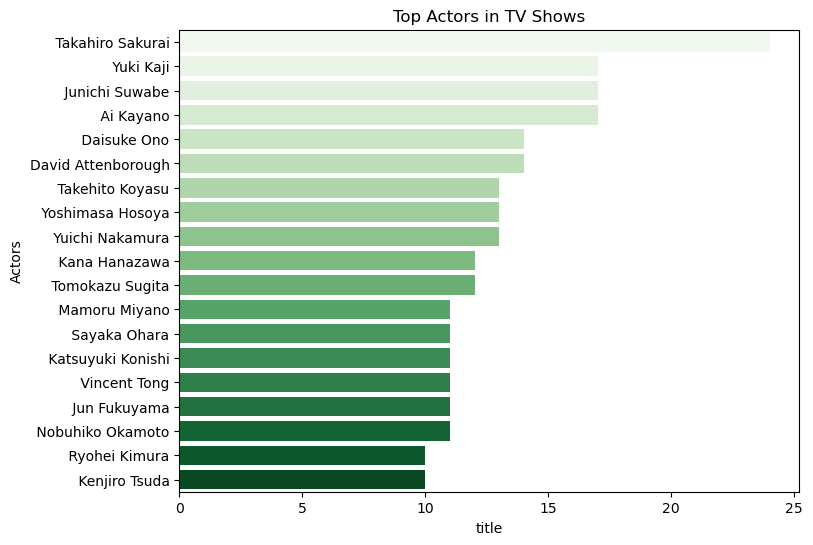

In [98]:
df_actors_tv=df_tvshow.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:20]
df_actors_tv=df_actors_tv[df_actors_tv['Actors']!='Unknown Actor']
plt.figure(figsize=(8,6))
plt.title('Top Actors in TV Shows')
sns.barplot(data=df_actors_tv,x='title',y='Actors',palette="Greens")
plt.show()

- Takahiro Sakurai, Yuki Kaji, Junichi Suwabe, Ai Kayano and David Attenborough are the top 5 most popular actors across netflix in TV shows.

### Analysis of Directors for TV shows

In [99]:
df_director_tv=df_tvshow.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index()
df_director_tv

,Directors,title
0,Abhishek Chaubey,1
1,Aco Tenriyagelli,1
2,Alan Poul,1
3,Alban Teurlai,1
4,Andrés Beltrán,1
...,...,...
296,Vijay S. Bhanushali,1
297,Vikramaditya Motwane,1
298,Wouter Bouvijn,1
299,Yasuhiro Irie,1


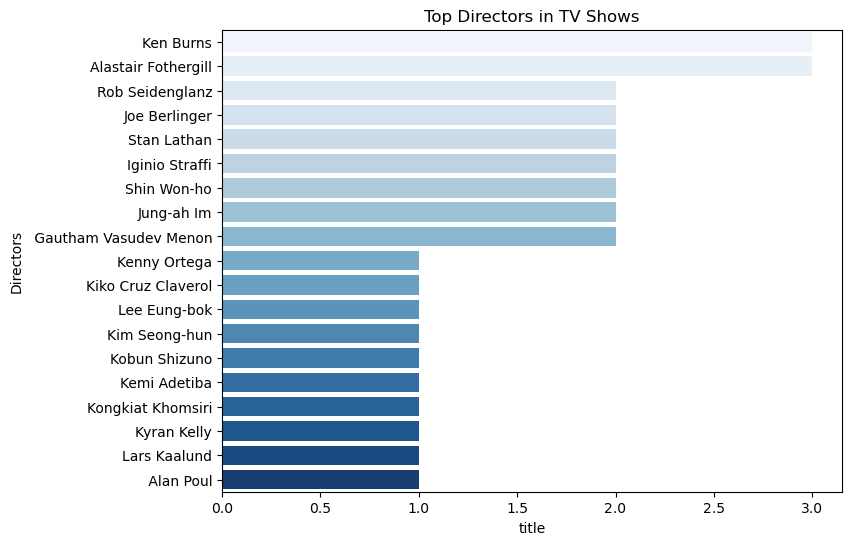

In [176]:
df_director_tv=df_tvshow.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:20]
df_director_tv=df_director_tv[df_director_tv['Directors']!='Unknown Director']
plt.figure(figsize=(8,6))
plt.title('Top Directors in TV Shows')
sns.barplot(data=df_director_tv,x='title',y='Directors',palette="Blues")
plt.show()

- Ken Burns, Alastair Fothergill, Rob Seindenglanz are top 3 among the directors of TV shows across Netflix.

### Analysis of genre for TV shows

In [101]:
df_genre_tv=df_tvshow.groupby(['Genre']).aggregate({'title':'nunique'}).sort_values(by=['title'], ascending=False).reset_index()
df_genre_tv.head(10)

,Genre,title
0,International TV Shows,774
1,TV Dramas,696
2,International TV Shows,577
3,TV Comedies,461
4,Crime TV Shows,399
5,Kids' TV,388
6,Romantic TV Shows,338
7,British TV Shows,253
8,Docuseries,221
9,Anime Series,176


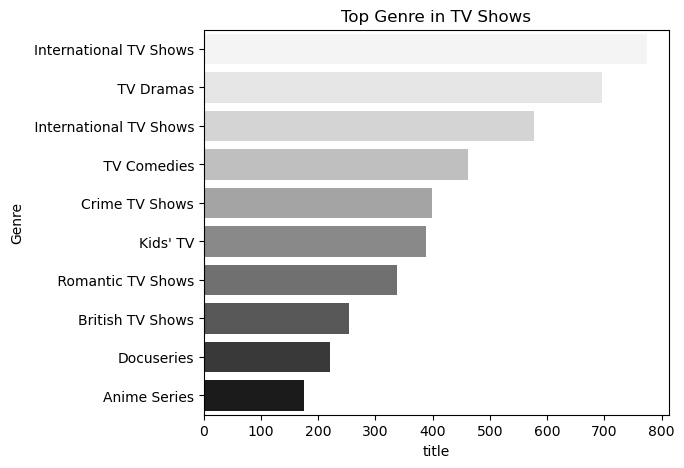

In [102]:
df_genre_tv=df_tvshow.groupby(['Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
plt.figure(figsize=(6,5))
plt.title('Top Genre in TV Shows')
sns.barplot(data=df_genre_tv,x='title',y='Genre',palette="Greys")
plt.show()

- International TV shows, TV dramas, TV comedies, Crime TV shows and Kids TV are the top 5 most popular genre on Netflix TV shows

### Analysis of TV shows from each country

In [103]:
df_country_tv=df_tvshow.groupby(['Country']).aggregate({'title':'nunique'}).sort_values(by=['title'], ascending=False).reset_index()
df_country_tv

,Country,title
0,United States,847
1,Unknown Country,391
2,United Kingdom,246
3,Japan,174
4,South Korea,164
...,...,...
98,Belarus,1
99,Croatia,1
100,Cyprus,1
101,Czech Republic,1


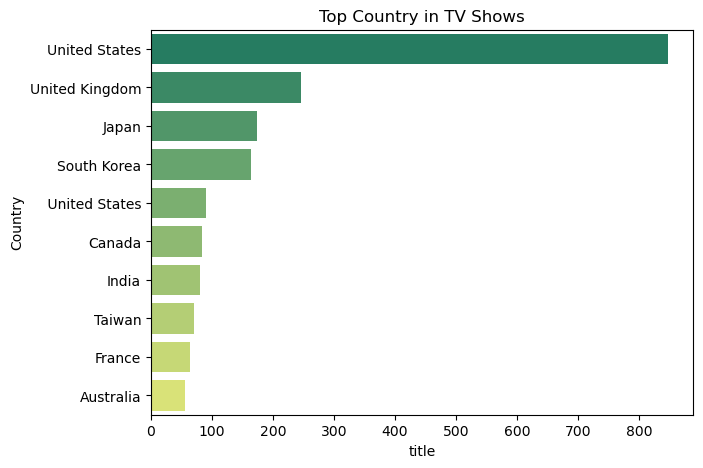

In [174]:
df_country_tv=df_tvshow.groupby(['Country']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(7,5))
plt.title('Top Country in TV Shows')
sns.barplot(data=df_country_tv,x='title',y='Country', palette='summer')
plt.show()

- USA, UK, Japan, South Korea and Canada are top 5 popular countries among the Netflix TV shows

### Analysis of TV Rating for TV shows

In [105]:
df_rating_tv=df_tvshow.groupby(['rating']).aggregate({'title':'nunique'}).sort_values(by=['title'], ascending=False)
df_rating_tv

,title
rating,
TV-MA : Adults,1145
TV-14 : Teens,733
TV-PG : Older Kids,323
TV-Y7 : Older Kids,195
TV-Y : Kids,176
TV-G : Kids,94
NR : Adults,5
R : Adults,2
TV-Y7-FV : Older Kids,1


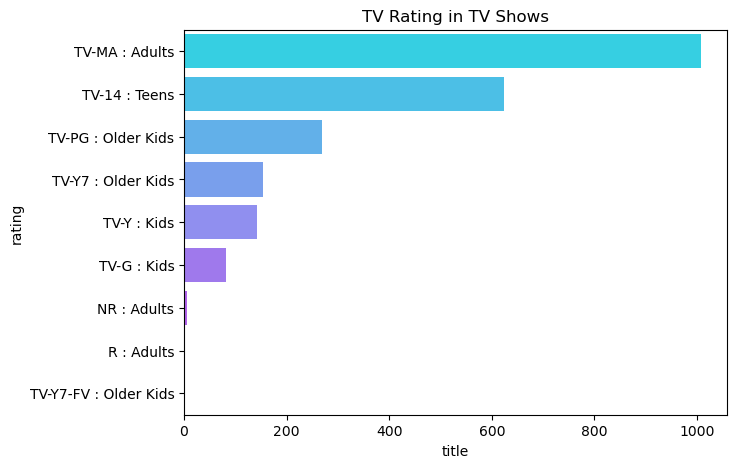

In [173]:
df_rating_tv=df_tvshow.groupby(['rating']).aggregate({'title':'nunique'}).sort_values(by=['title'], ascending=False).reset_index()
plt.figure(figsize=(7,5))
plt.title('TV Rating in TV Shows')
sns.barplot(data=df_rating_tv,x='title',y='rating', palette='cool')
plt.show()

- Most of the content on Netflix are rated for Mature Audiences, content not intended for audience under 14 and those which require Parental Guidance.

### Analysis of Duration for TV shows

In [107]:
df_duration_tv=df_tvshow.groupby(['duration']).aggregate({"title":"nunique"}).reset_index()
df_duration_tv

,duration,title
0,1 Season,1793
1,10 Seasons,7
2,11 Seasons,2
3,12 Seasons,2
4,13 Seasons,3
5,15 Seasons,2
6,17 Seasons,1
7,2 Seasons,425
8,3 Seasons,199
9,4 Seasons,95


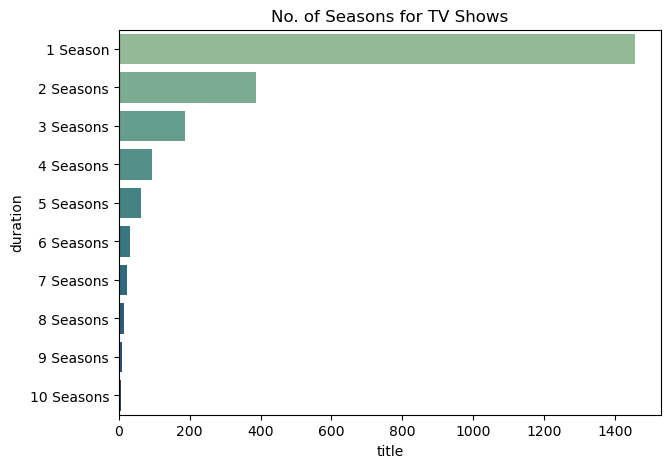

In [172]:
df_duration_tv=df_tvshow.groupby(['duration']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(7,5))
plt.title('No. of Seasons for TV Shows')
sns.barplot(data=df_duration_tv,x='title',y='duration',palette='crest')
plt.show()

- Most watched TV shows on Netflix are the ones with only one or two seasons available.

### Analysis of TV show added across the years

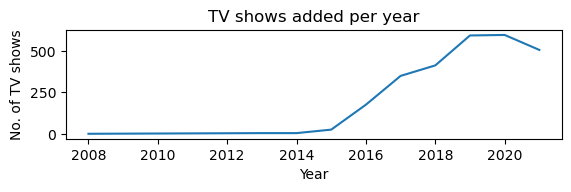

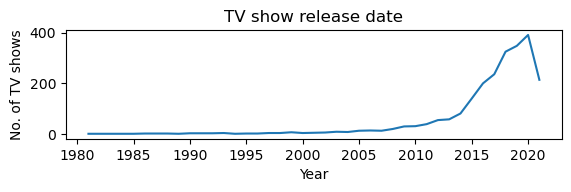

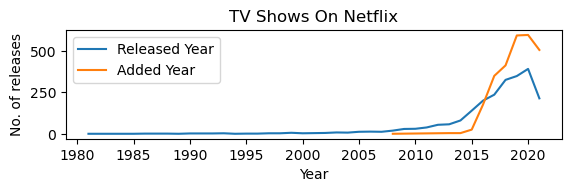

In [171]:
# TV shows added in a year¶

plt.subplot(3,1,1)
df_year_tv=df_date_tv.groupby(['added_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
sns.lineplot(data=df_year_tv, x='added_year', y='title')
plt.title('TV shows added per year')
plt.ylabel("No. of TV shows")
plt.xlabel("Year")
plt.show()

# TV show released year

plt.subplot(3,1,2)
df_release_tv=df_tvshow.groupby(['release_year']).aggregate({'title':'nunique'}).reset_index()
df_release_tv=df_release_tv[df_release_tv['release_year']>=1980]
sns.lineplot(data=df_release_tv, x='release_year', y='title')
plt.title('TV show release date')
plt.ylabel('No. of TV shows')
plt.xlabel('Year')
plt.show()

# TV Shows On Netflix
plt.subplot(3,1,3)
df_release_tv=df_release_tv[df_release_tv['release_year']>=1980]
sns.lineplot(data=df_release_tv, x='release_year', y='title')
sns.lineplot(data=df_year_tv, x='added_year', y='title')
plt.title('TV Shows On Netflix')
plt.legend(['Released Year','Added Year'])
plt.ylabel('No. of releases')
plt.xlabel('Year')
plt.show()

- The Amount of movies added across Netflix has increased from 2008 coonsistently till 2019. Then started declining.
- Same trend is followed by the actual release date of the movies.

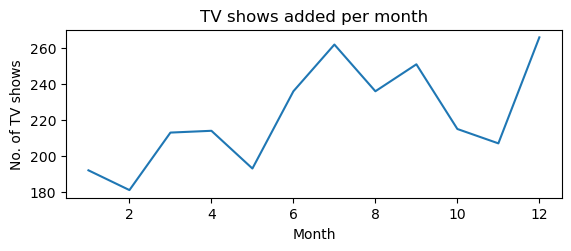

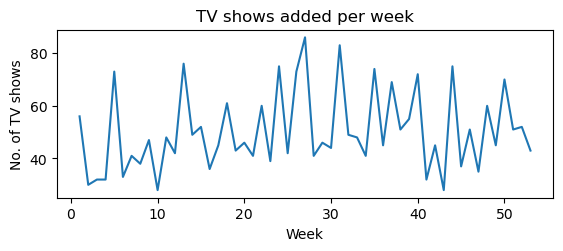

In [110]:
# TV shows added per month

plt.subplot(2,1,1)
df_month_tv=df_date_tv.groupby(['added_month']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
sns.lineplot(data=df_month_tv, x='added_month', y='title')
plt.title('TV shows added per month')
plt.ylabel("No. of TV shows")
plt.xlabel("Month")
plt.show()

# TV shows added per week
df_week_tv=df_date_tv.groupby(['added_week']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.subplot(2,1,2)
sns.lineplot(data=df_week_tv, x='added_week', y='title')
plt.title('TV shows added per week')
plt.ylabel("No. of TV shows")
plt.xlabel("Week")
plt.show()

- Most of the movies are added towards the middle (June - July) and towards last of the month across Netflix
- Movies are added on Netflix mostly towrds the middle week of the year and it follows a zig zag pattern.

### Relation between directors and actors for TV shows

In [111]:
df_tv_director_actor=df_tvshow.groupby(['Directors','Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_tv_directors_actors=df_tv_director_actor[df_tv_director_actor['Directors']!='Unknown Director']
df_tv_directors_actors=df_tv_directors_actors[df_tv_directors_actors['Actors']!='Unknown Director']
df_tv_directors_actors

,Directors,Actors,title
729,Alastair Fothergill,David Attenborough,3
2204,Stan Lathan,Dave Chappelle,2
2125,Shin Won-ho,Sung Dong-il,2
2119,Shin Won-ho,Lee Il-hwa,2
214,Gautham Vasudev Menon,Anjali,2
...,...,...,...
1308,Jay Oliva,Darren Criss,1
1309,Jay Oliva,Jon Jon Briones,1
1310,Jay Oliva,Liza Soberano,1
1,Abhishek Chaubey,Ali Fazal,1


In [112]:
df_tv_directors_actors['Actors combined with Directors'] = df_tv_directors_actors.Actors.str.cat(df_tv_directors_actors.Directors, sep=' - ')
df_tv_directors_actors.head(15)

,Directors,Actors,title,Actors combined with Directors
729,Alastair Fothergill,David Attenborough,3,David Attenborough - Alastair Fothergill
2204,Stan Lathan,Dave Chappelle,2,Dave Chappelle - Stan Lathan
2125,Shin Won-ho,Sung Dong-il,2,Sung Dong-il - Shin Won-ho
2119,Shin Won-ho,Lee Il-hwa,2,Lee Il-hwa - Shin Won-ho
214,Gautham Vasudev Menon,Anjali,2,Anjali - Gautham Vasudev Menon
229,Gautham Vasudev Menon,Prakash Raj,2,Prakash Raj - Gautham Vasudev Menon
221,Gautham Vasudev Menon,Gautham Vasudev Menon,2,Gautham Vasudev Menon - Gautham Vasudev Menon
1447,Ken Burns,Unknown Actor,2,Unknown Actor - Ken Burns
0,Abhishek Chaubey,Akansha Ranjan Kapoor,1,Akansha Ranjan Kapoor - Abhishek Chaubey
16649,Uzodinma Okpechi,Bunmi Shogade,1,Bunmi Shogade - Uzodinma Okpechi


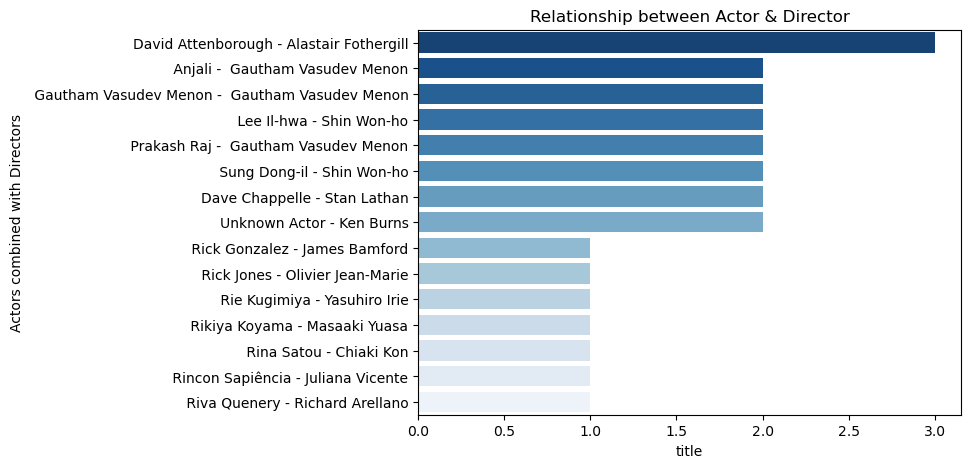

In [170]:
df_tv_directors_actors=df_tv_directors_actors.groupby(['Actors combined with Directors']).aggregate({"title":"sum"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(7,5))
plt.title('Relationship between Actor & Director')
sns.barplot(data=df_tv_directors_actors,x='title',y='Actors combined with Directors',palette="Blues_r")
plt.show()

Top 5 combinations of Actor - Director for TV shows in Netflix is :
- David Attenborough - Alastair Fothergill
- Anjali -  Gautham Vasudev Menon
- Gautham Vasudev Menon -  Gautham Vasudev Menon
- Lee Il-hwa - Shin Won-ho
- Prakash Raj -  Gautham Vasudev Menon

### Relation between release year and duration for TV shows

In [114]:
df_tv_Ryear_duration=df_tvshow.groupby(['release_year','duration']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_tv_Ryear_duration.head(15)

,release_year,duration,title
157,2020,1 Season,291
135,2018,1 Season,256
145,2019,1 Season,252
167,2021,1 Season,203
125,2017,1 Season,176
118,2016,1 Season,167
109,2015,1 Season,116
149,2019,2 Seasons,73
159,2020,2 Seasons,69
102,2014,1 Season,64


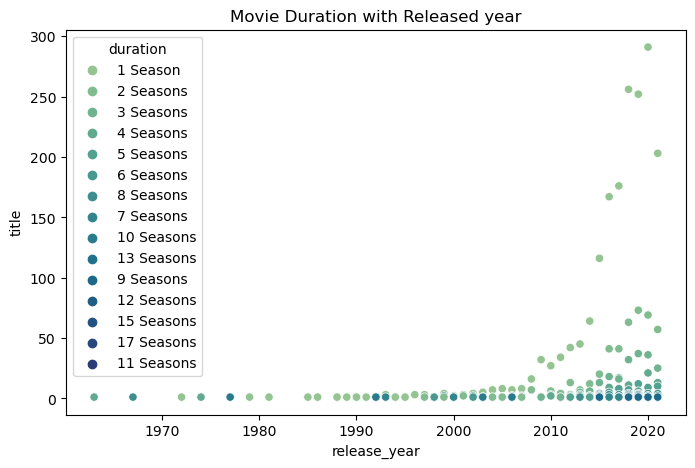

In [115]:
df_tv_Ryear_duration=df_tv_Ryear_duration[df_tv_Ryear_duration['release_year']>=1950]
plt.figure(figsize=(8,5))
sns.scatterplot(x ='release_year', y ='title', data= df_tv_Ryear_duration, hue='duration',palette="crest")
plt.title('Movie Duration with Released year')
plt.show()

- Number of TV show release increased abruptly over the last 2 decades
- Most number of TV shows across Netflix has the fewer number of seasons

### Relation between country and genre for TV shows

In [116]:
df_tv_country_genre=df_tvshow.groupby(['Country','Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_tv_country_genre=df_tv_country_genre[df_tv_country_genre['Country']!='Unknown Country']
df_tv_country_genre.head(15)

,Country,Genre,title
794,United Kingdom,British TV Shows,216
828,United States,Kids' TV,179
816,United States,TV Dramas,150
563,Japan,Anime Series,136
815,United States,TV Comedies,135
696,South Korea,Korean TV Shows,131
707,South Korea,International TV Shows,127
826,United States,Docuseries,125
782,United Kingdom,International TV Shows,120
825,United States,Crime TV Shows,119


In [117]:
df_tv_country_genre['Country and Favorite Genre'] = df_tv_country_genre.Country.str.cat(df_tv_country_genre.Genre, sep=' - ')
df_tv_country_genre.head(15)

,Country,Genre,title,Country and Favorite Genre
794,United Kingdom,British TV Shows,216,United Kingdom - British TV Shows
828,United States,Kids' TV,179,United States - Kids' TV
816,United States,TV Dramas,150,United States - TV Dramas
563,Japan,Anime Series,136,Japan - Anime Series
815,United States,TV Comedies,135,United States - TV Comedies
696,South Korea,Korean TV Shows,131,South Korea - Korean TV Shows
707,South Korea,International TV Shows,127,South Korea - International TV Shows
826,United States,Docuseries,125,United States - Docuseries
782,United Kingdom,International TV Shows,120,United Kingdom - International TV Shows
825,United States,Crime TV Shows,119,United States - Crime TV Shows


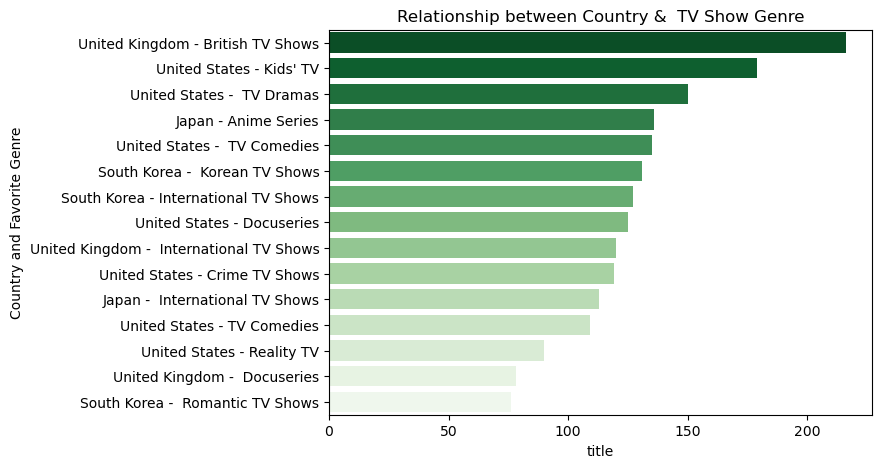

In [169]:
df_tv_country_genre=df_tv_country_genre.groupby(['Country and Favorite Genre']).aggregate({"title":"sum"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(7,5))
plt.title('Relationship between Country &  TV Show Genre')
sns.barplot(data=df_tv_country_genre,x='title',y='Country and Favorite Genre',palette='Greens_r')
plt.show()

- UK loves British TV shows the most followed by international TV shows
- In USA, Kids TV shows are the most favorite followed by TV dramas
- Anime is the popular genre in Japan


### Combination of country and rating for TV shows

In [119]:
df_tv_rating_Ryear=df_tvshow.groupby(['rating','release_year']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_tv_rating_Ryear

,rating,release_year,title
78,TV-MA : Adults,2020,249
77,TV-MA : Adults,2019,214
76,TV-MA : Adults,2018,191
79,TV-MA : Adults,2021,160
75,TV-MA : Adults,2017,114
...,...,...,...
80,TV-PG : Older Kids,1977,1
60,TV-MA : Adults,1999,1
59,TV-MA : Adults,1995,1
58,TV-MA : Adults,1993,1


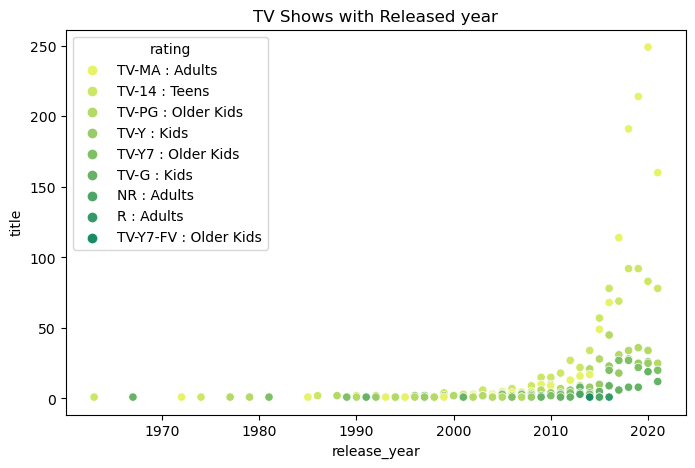

In [120]:
df_tv_rating_Ryear=df_tv_rating_Ryear[df_tv_rating_Ryear['release_year']>=1950]
plt.figure(figsize=(8,5))
sns.scatterplot(x ='release_year', y ='title', data= df_tv_rating_Ryear, hue='rating',palette="summer_r")
plt.title('TV Shows with Released year')
plt.show()

- Last few decades produced TV shows based on different type of rating. It can be found by observing new colors at the end of the plot.
- In recent years movies with adult rating are released more.
- Most of the shows require parental guidance

### Recommendations - Exploring a few questions : 
- Which are the top countries for TV Shows and Movies?
- Who are the popular actors/directors across in these countries?
- Which are the popular genres in these countries?
- Who are the popular targeted audiences Netflix?
- what is the duration of content which depicts attention span?
- When during the year are the movies/TV shows added to the platform?

 Popular coutries for movies

In [121]:
df_movies=df_movies[df_movies['Country']!='Unknown Country']
df_movies.Country.value_counts().reset_index().head(10)

,index,Country
0,United States,38316
1,India,20761
2,United States,7501
3,United Kingdom,5655
4,France,3592
5,France,3015
6,Canada,2928
7,United Kingdom,2925
8,Canada,2810
9,Japan,2644


 Popular coutries for TV Shows

In [122]:
df_tvshow=df_tvshow[df_tvshow['Country']!='Unknown Country']
df_tvshow.Country.value_counts().reset_index().head(10)

,index,Country
0,United States,11552
1,Japan,4673
2,United Kingdom,4078
3,South Korea,3648
4,United States,1981
5,Taiwan,1719
6,Mexico,1683
7,Spain,1647
8,Canada,1467
9,India,1378


#### USA, India and Japan are chosen to analyse Movies/TV shows in their respective countries.
- In **Japan, South Korea** and together with some **Latin American** and **European** coutries TV shows are found to be more popular than movies.

### Visual Analysis of Movies and TV shows for the United States

In [123]:
df_usa_movies=df_movies[df_movies['Country']=='United States'].reset_index()
df_usa_tv=df_tvshow[df_tvshow['Country']=='United States'].reset_index()

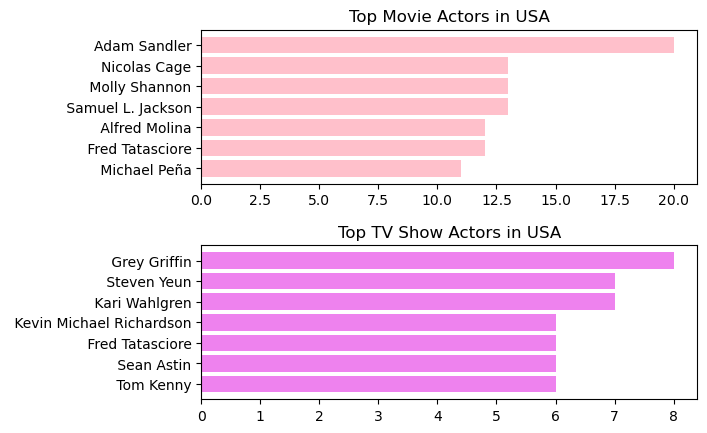

In [124]:
fig, (ax1,ax2) = plt.subplots(2,1)

#USA MOVIE ACTORS

df_usa_movies_actors=df_usa_movies.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_usa_movies_actors=df_usa_movies_actors[df_usa_movies_actors['Actors']!='Unknown Actor']
ax1.barh(df_usa_movies_actors['Actors'][::-1],df_usa_movies_actors['title'][::-1],color='pink')
ax1.set_title('Top Movie Actors in USA')

#USA TV SHOW ACTORS

df_usa_tv_actors=df_usa_tv.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_usa_tv_actors=df_usa_tv_actors[df_usa_tv_actors['Actors']!='Unknown Actor']
ax2.barh(df_usa_tv_actors['Actors'][::-1],df_usa_tv_actors['title'][::-1],color='violet')
ax2.set_title('Top TV Show Actors in USA')

plt.subplots_adjust(hspace=0.4)

Top 5 popular **actors** in movies across **USA** : 
- Adam Sandler
- Nicolas Cage
- Molly Shannon
- Samuel Jackson
- Alfred Molina 

Top 5 popular **actors** in TV shows across **USA** :
- Grey Griffin
- Steven Yuen
- Kari Wahlgren
- Kevin Micheal
- Fred Tatasciore

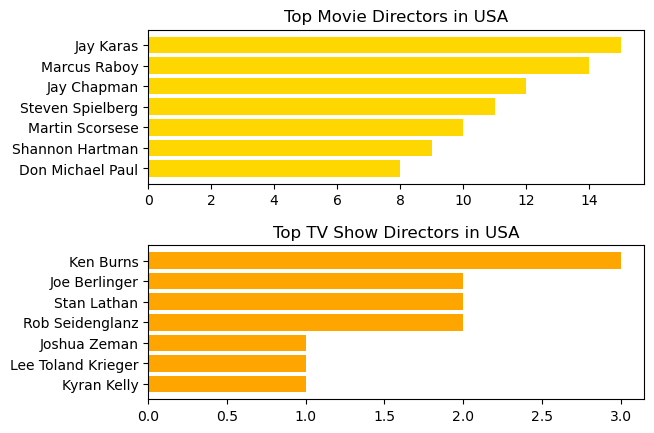

In [125]:
fig, (ax1,ax2) = plt.subplots(2,1)

#USA MOVIE DIRECTORS

df_usa_movies_directors=df_usa_movies.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_usa_movies_directors=df_usa_movies_directors[df_usa_movies_directors['Directors']!='Unknown Director']
ax1.barh(df_usa_movies_directors['Directors'][::-1],df_usa_movies_directors['title'][::-1],color='gold')
ax1.set_title('Top Movie Directors in USA')

#USA TV SHOW DIRECTORS

df_usa_tv_directors=df_usa_tv.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_usa_tv_directors=df_usa_tv_directors[df_usa_tv_directors['Directors']!='Unknown Director']
ax2.barh(df_usa_tv_directors['Directors'][::-1],df_usa_tv_directors['title'][::-1],color='orange')
ax2.set_title('Top TV Show Directors in USA')

plt.subplots_adjust(hspace=0.4)

Top 5 popular **directors** for movies across **USA** : 
- Jay Karas
- Marcus Raboy
- Jay Chapman
- Steven Spielberg
- Martijn Scorsese

Top 5 popular **directors** for TV shows across **USA** :
- Ken Burns
- Jose Berlinger
- Stan Lathan
- Rob Seidenglanz
- Joshua Zeman

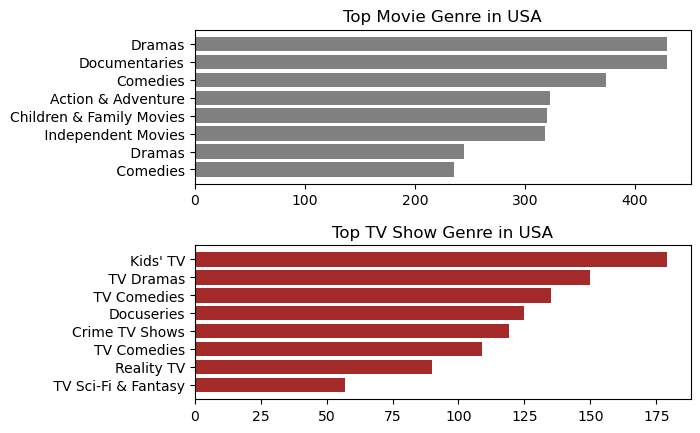

In [126]:
fig, (ax1,ax2) = plt.subplots(2,1)

#USA MOVIE GENRE

df_usa_movies_genre=df_usa_movies.groupby(['Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax1.barh(df_usa_movies_genre['Genre'][::-1],df_usa_movies_genre['title'][::-1],color='grey')
ax1.set_title('Top Movie Genre in USA')

#USA TV SHOW GENRE

df_usa_tv_genre=df_usa_tv.groupby(['Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax2.barh(df_usa_tv_genre['Genre'][::-1],df_usa_tv_genre['title'][::-1],color='brown')
ax2.set_title('Top TV Show Genre in USA')

plt.subplots_adjust(hspace=0.4)

Top 5 popular **genre** among movies across **USA** : 
- Drama
- Documentaries
- Comedies
- Action & Adventure
- Children & Family 

Top 5 popular **genre** among TV shows across **USA** :
- Kids TV
- TV Dramas
- Docuseries
- Crime TV Shows
- TV Comedies

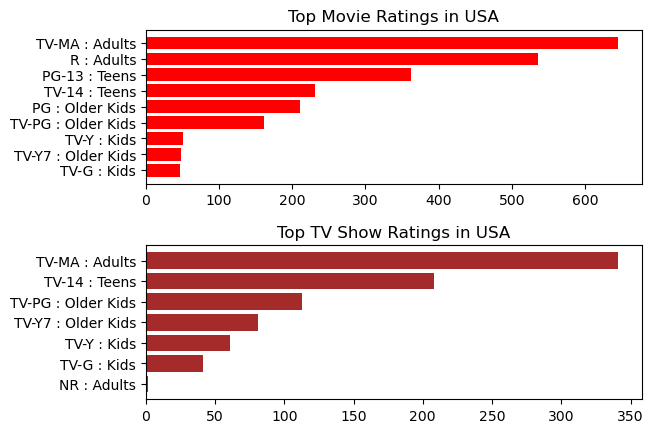

In [127]:
fig, (ax1,ax2) = plt.subplots(2,1)

#USA MOVIE RATING

df_usa_movies_rating=df_usa_movies.groupby(['rating']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:9]
ax1.barh(df_usa_movies_rating['rating'][::-1],df_usa_movies_rating['title'][::-1],color='red')
ax1.set_title('Top Movie Ratings in USA')

#USA TV SHOW RATING

df_usa_tv_rating=df_usa_tv.groupby(['rating']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
ax2.barh(df_usa_tv_rating['rating'][::-1],df_usa_tv_rating['title'][::-1],color='brown')
ax2.set_title('Top TV Show Ratings in USA')

plt.subplots_adjust(hspace=0.4)

- Most of the movies released on Netflix in USA are targeted towards adult audiences. Second most popular show ratings are for teens.

- Similarly, Most of the TV shows released on Netflix in USA are also targeted towards adult audiences and teens

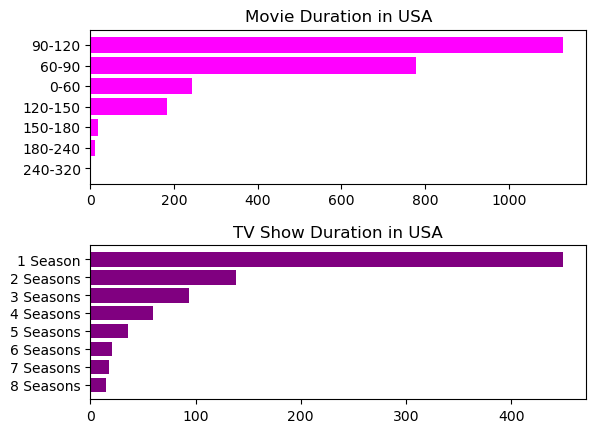

In [128]:
fig, (ax1,ax2) = plt.subplots(2,1)

#USA MOVIE DURATION

df_usa_movies_duration=df_usa_movies.groupby(['duration']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)
ax1.barh(df_usa_movies_duration['duration'][::-1],df_usa_movies_duration['title'][::-1],color='Magenta')
ax1.set_title('Movie Duration in USA')

#USA TV SHOW DURATION

df_usa_tv_duration=df_usa_tv.groupby(['duration']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax2.barh(df_usa_tv_duration['duration'][::-1],df_usa_tv_duration['title'][::-1],color='purple')
ax2.set_title('TV Show Duration in USA')

plt.subplots_adjust(hspace=0.4)

- Most popular movie duration for USA audiences were around 90 - 120 mins and as for TV shows the USA audience opted for series with fewer number of seasons

In [129]:
df_usa_movie_date=df_date_movies[df_date_movies['Country']=='United States'].reset_index()
df_usa_tv_date=df_date_tv[df_date_tv['Country']=='United States'].reset_index()

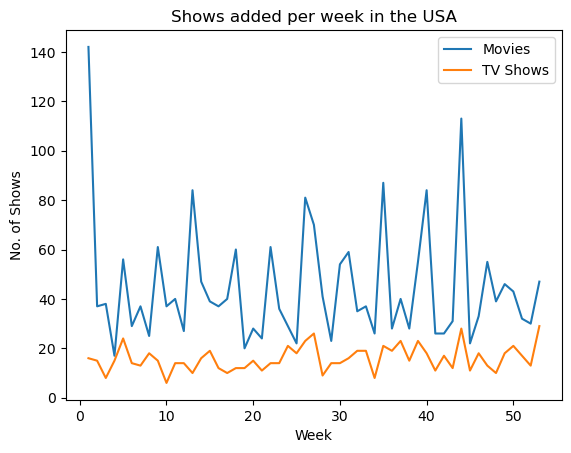

In [130]:
#SHOWS ADDED TO THE PLATFORM PER WEEK IN THE USA

df_usa_week_movie=df_usa_movie_date.groupby(['added_week']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_usa_week_tv=df_usa_tv_date.groupby(['added_week']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_usa_week_movie, x='added_week', y='title')
sns.lineplot(data=df_usa_week_tv, x='added_week', y='title')
plt.title('Shows added per week in the USA')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Week")
plt.show()


- Both movies and TV shows are mostly added to the platform at the beginning and towards the end week of a year. However the trend follows in a zigzag fasion
- The amount of Movies added per week are much higher than that of the TV shows

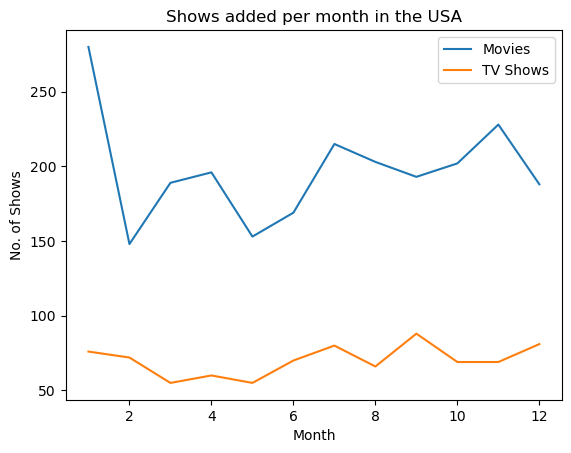

In [131]:
#SHOWS ADDED TO THE PLATFORM PER MONTH IN THE USA

df_usa_month_movie=df_usa_movie_date.groupby(['added_month']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_usa_month_tv=df_usa_tv_date.groupby(['added_month']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_usa_month_movie, x='added_month', y='title')
sns.lineplot(data=df_usa_month_tv, x='added_month', y='title')
plt.title('Shows added per month in the USA')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Month")
plt.show()


- Movies and TV shows were added in large amount at the beginning of the month whereas TV shows were added mostly in between July and October
- The amount of Movies added per month are much higher than that of the TV shows

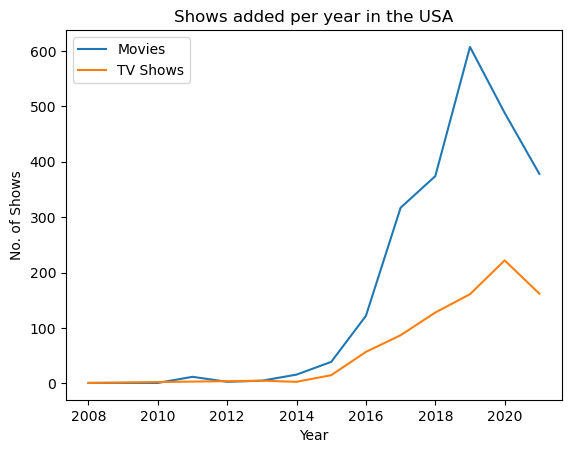

In [132]:
#SHOWS ADDED TO THE PLATFORM PER YEAR IN THE USA

df_usa_year_movie=df_usa_movie_date.groupby(['added_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_usa_year_tv=df_usa_tv_date.groupby(['added_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_usa_year_movie, x='added_year', y='title')
sns.lineplot(data=df_usa_year_tv, x='added_year', y='title')
plt.title('Shows added per year in the USA')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Year")
plt.show()


- In USA, both number of added Movies and Shows have reduced after 2020. Hoewever the amount of decrease in number of TV Shows were small as compared to Movies

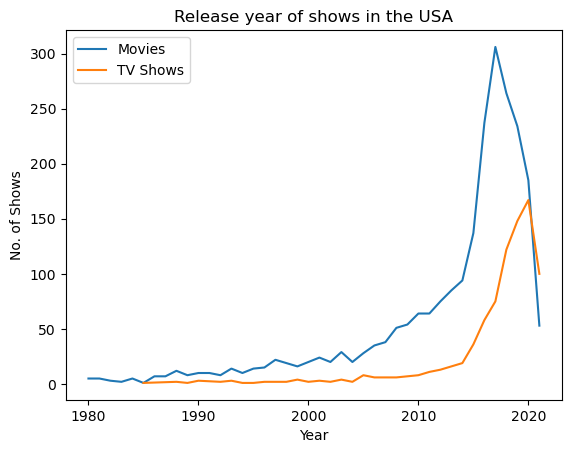

In [133]:
#ACTUAL RELEASE YEAR OF MOVIES AND TV SHOWS IN THE USA

df_usa_Ryear_movie=df_usa_movie_date.groupby(['release_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_usa_Ryear_movie=df_usa_Ryear_movie[df_usa_Ryear_movie['release_year']>=1980]

df_usa_Ryear_tv=df_usa_tv_date.groupby(['release_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_usa_Ryear_tv=df_usa_Ryear_tv[df_usa_Ryear_tv['release_year']>=1980]

sns.lineplot(data=df_usa_Ryear_movie, x='release_year', y='title')
sns.lineplot(data=df_usa_Ryear_tv, x='release_year', y='title')
plt.title('Release year of shows in the USA')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Year")
plt.show()


- The amount of release of both movies and TV shows sky rocketed along last 3 decades. However it showed a sudden decline after year 2020

In [134]:
df_usa_movie_director_actor=df_usa_movies.groupby(['Directors','Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_usa_movie_director_actor=df_usa_movie_director_actor[df_usa_movie_director_actor['Directors']!='Unknown Director']
df_usa_movie_director_actor=df_usa_movie_director_actor[df_usa_movie_director_actor['Actors']!='Unknown Director']

df_usa_movie_director_actor['Actors combined with Directors'] = df_usa_movie_director_actor.Actors.str.cat(df_usa_movie_director_actor.Directors, sep=' - ')
df_usa_movie_director_actor

,Directors,Actors,title,Actors combined with Directors
15770,Robert Rodriguez,Alexa PenaVega,5,Alexa PenaVega - Robert Rodriguez
11525,Leslie Small,Kevin Hart,5,Kevin Hart - Leslie Small
17813,Steven Spielberg,Harrison Ford,4,Harrison Ford - Steven Spielberg
13138,Michael Tiddes,Marlon Wayans,4,Marlon Wayans - Michael Tiddes
8543,Ishi Rudell,Andrea Libman,4,Andrea Libman - Ishi Rudell
...,...,...,...,...
6528,Dee Rees,Rosie Perez,1,Rosie Perez - Dee Rees
6527,Dee Rees,Rob Morgan,1,Rob Morgan - Dee Rees
6526,Dee Rees,Onata Aprile,1,Onata Aprile - Dee Rees
6525,Dee Rees,Mel Rodriguez,1,Mel Rodriguez - Dee Rees


In [135]:
df_usa_tv_director_actor=df_usa_tv.groupby(['Directors','Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_usa_tv_director_actor=df_usa_tv_director_actor[df_usa_tv_director_actor['Directors']!='Unknown Director']
df_usa_tv_director_actor=df_usa_tv_director_actor[df_usa_tv_director_actor['Actors']!='Unknown Director']

df_usa_tv_director_actor['Actors combined with Directors'] = df_usa_tv_director_actor.Actors.str.cat(df_usa_tv_director_actor.Directors, sep=' - ')
df_usa_tv_director_actor

,Directors,Actors,title,Actors combined with Directors
275,Stan Lathan,Dave Chappelle,2,Dave Chappelle - Stan Lathan
189,Ken Burns,Unknown Actor,2,Unknown Actor - Ken Burns
0,Alban Teurlai,Unknown Actor,1,Unknown Actor - Alban Teurlai
218,Moyoung Jin,Unknown Actor,1,Unknown Actor - Moyoung Jin
198,Kenny Ortega,Savannah Lee May,1,Savannah Lee May - Kenny Ortega
...,...,...,...,...
95,Eli Roth,Nicole Boivin,1,Nicole Boivin - Eli Roth
94,Eli Roth,Michael Andreae,1,Michael Andreae - Eli Roth
93,Eli Roth,Marty Adams,1,Marty Adams - Eli Roth
1,Barbara Schroeder,Unknown Actor,1,Unknown Actor - Barbara Schroeder


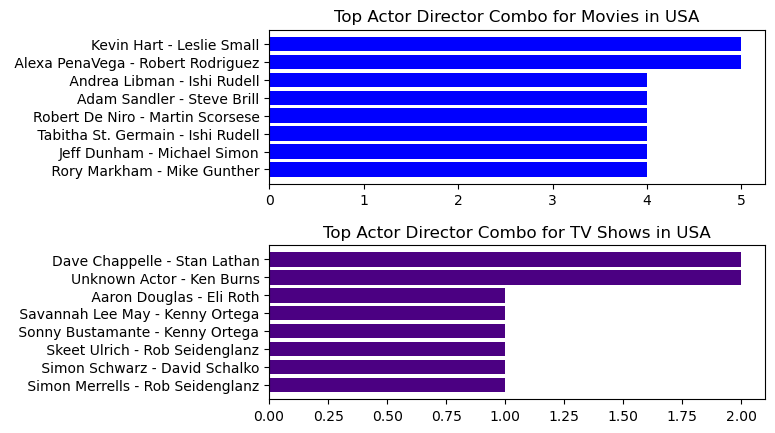

In [136]:
fig, (ax1,ax2) = plt.subplots(2,1)

#USA MOVIE BEST ACTOR - DIRECTOR COMBINATION

df_usa_m_actor_director=df_usa_movie_director_actor.groupby(['Actors combined with Directors']).aggregate({'title':'sum'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax1.barh(df_usa_m_actor_director['Actors combined with Directors'][::-1],df_usa_m_actor_director['title'][::-1],color='blue')
ax1.set_title('Top Actor Director Combo for Movies in USA')

#USA TV SHOW BEST ACTOR - DIRECTOR COMBINATION

df_usa_t_actor_director=df_usa_tv_director_actor.groupby(['Actors combined with Directors']).aggregate({'title':'sum'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax2.barh(df_usa_t_actor_director['Actors combined with Directors'][::-1],df_usa_t_actor_director['title'][::-1],color='indigo')
ax2.set_title('Top Actor Director Combo for TV Shows in USA')

plt.subplots_adjust(hspace=0.4)

Top 5 **Actor - Director** Combo in Movies Across **USA** :

- Kevin Hart - Leslie Small
- Alexa PenaVega - Robert Rodriguez
- Andrea Libman - Ishi Rudell
- Adam Sandler - Steve Brill
- Robert De Niro - Martin Scorsese

Top 5 **Actor - Director** Combo in TV Shows Across **USA** :
- Dave Chappelle - Stan Latham
- Aaron Douglas - Eli roth
- Savannah Lee - Kenny Ortega
- Sonny Bustamante - Kenny Ortega
- Skeet Ulrich - Rob Seidenglanz

#### Conclusion for visual analysis of data for USA
- The number of movies released in the USA per year is very high compared to that of TV shows across the platform
- The number of added Movies and TV shows have reduced steadily after 2020 pertaining to COVID 19 scenario
- Most of the movies and TV shows released on Netflix in USA are targeted towards adult and teen audiences
- Drama, documentary, kids tv show etc., are the popular genre among USA audiences
- Adam Sandler & Nicolas Cage are among the top popular actors for movies
- Grey Griffin & Steven Yuen are among the top actors for TV shows
- The US audience engagement were highest at duration between 90 - 120 mins for movies, and single season for TV shows
- Top collaborations between actor and directors for both movies and TV shows were with comedy performers

### Visual Analysis of Movies and TV shows for India

In [137]:
df_ind_movies=df_movies[df_movies['Country']=='India'].reset_index()
df_ind_tv=df_tvshow[df_tvshow['Country']=='India'].reset_index()

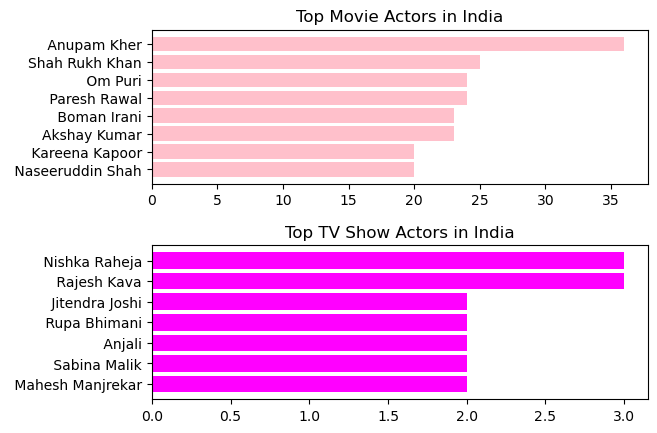

In [138]:
fig, (ax1,ax2) = plt.subplots(2,1)

#INDIA MOVIE ACTORS

df_ind_movies_actors=df_ind_movies.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_ind_movies_actors=df_ind_movies_actors[df_ind_movies_actors['Actors']!='Unknown Actor']
ax1.barh(df_ind_movies_actors['Actors'][::-1],df_ind_movies_actors['title'][::-1],color='pink')
ax1.set_title('Top Movie Actors in India')

#USA TV SHOW ACTORS

df_ind_tv_actors=df_ind_tv.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_ind_tv_actors=df_ind_tv_actors[df_ind_tv_actors['Actors']!='Unknown Actor']
ax2.barh(df_ind_tv_actors['Actors'][::-1],df_ind_tv_actors['title'][::-1],color='magenta')
ax2.set_title('Top TV Show Actors in India')

plt.subplots_adjust(hspace=0.4)

Top 5 popular **actors** in movies across **India** : 
- Anupam Kher
- Shah Rukh Khan
- Om Puri
- Paresh Rawal
- Boman Irani

Top 5 popular **actors** in TV shows across **India** :
- Nishka Raheja
- Rajesh Kava
- Jitendra Joshi
- Rupa Bhimani
- Anjali

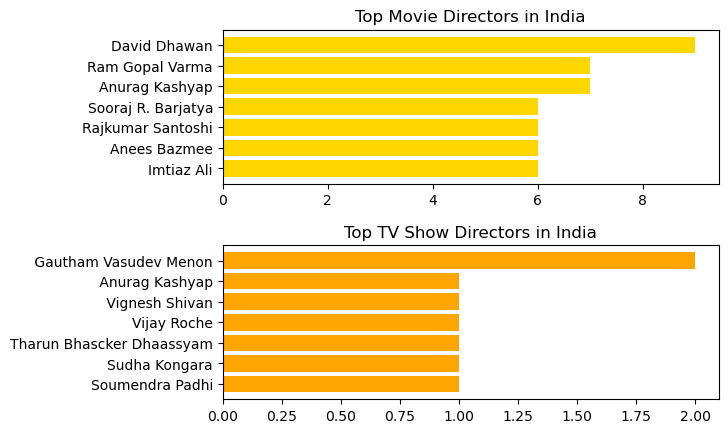

In [139]:
fig, (ax1,ax2) = plt.subplots(2,1)

#INDIA MOVIE DIRECTORS

df_ind_movies_directors=df_ind_movies.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_ind_movies_directors=df_ind_movies_directors[df_ind_movies_directors['Directors']!='Unknown Director']
ax1.barh(df_ind_movies_directors['Directors'][::-1],df_ind_movies_directors['title'][::-1],color='gold')
ax1.set_title('Top Movie Directors in India')

#INDIA TV SHOW DIRECTORS

df_ind_tv_directors=df_ind_tv.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_ind_tv_directors=df_ind_tv_directors[df_ind_tv_directors['Directors']!='Unknown Director']
ax2.barh(df_ind_tv_directors['Directors'][::-1],df_ind_tv_directors['title'][::-1],color='orange')
ax2.set_title('Top TV Show Directors in India')

plt.subplots_adjust(hspace=0.4)

Top 5 popular **directors** for movies across **India** : 
- David Dhawan
- Ram Gopal Varma
- Anurag Kashyap
- Sooraj R. Barjatya
- Ramkumar Santhoshi

Top 5 popular **directors** for TV shows across **India** :
- Gautham Vasudeva Menon
- Anurag Kashyap
- Vignesh Shivan
- Vijay Roche
- Tharun Bhascker

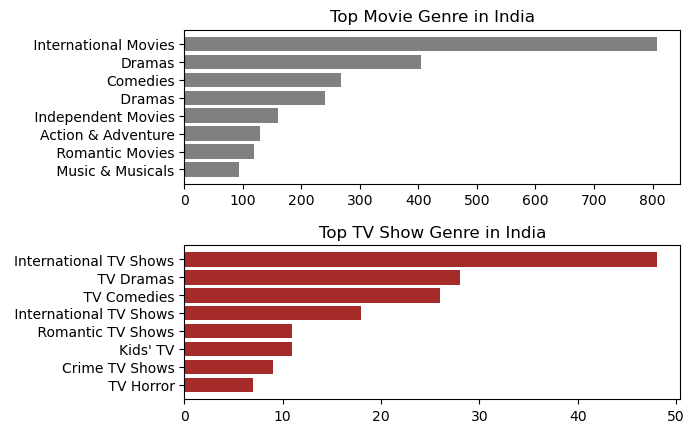

In [140]:
fig, (ax1,ax2) = plt.subplots(2,1)

#INDIA MOVIE GENRE

df_ind_movies_genre=df_ind_movies.groupby(['Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax1.barh(df_ind_movies_genre['Genre'][::-1],df_ind_movies_genre['title'][::-1],color='grey')
ax1.set_title('Top Movie Genre in India')

#INDIA TV SHOW GENRE

df_ind_tv_genre=df_ind_tv.groupby(['Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax2.barh(df_ind_tv_genre['Genre'][::-1],df_ind_tv_genre['title'][::-1],color='brown')
ax2.set_title('Top TV Show Genre in India')

plt.subplots_adjust(hspace=0.4)

Top 5 popular **genre** among movies across **India** : 
- International Movies
- Dramas
- Comedies
- Independent Movies
- Action & Adventure 

Top 5 popular **genre** among TV shows across **India** :
- International TV Shows
- TV Dramas
- TV Comedies
- Romantic TV Shows
- Kids TV

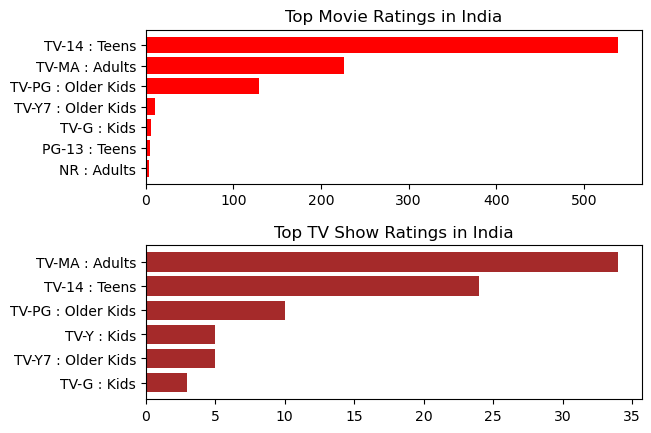

In [141]:
fig, (ax1,ax2) = plt.subplots(2,1)

#INDIA MOVIE RATING

df_ind_movies_rating=df_ind_movies.groupby(['rating']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:7]
ax1.barh(df_ind_movies_rating['rating'][::-1],df_ind_movies_rating['title'][::-1],color='red')
ax1.set_title('Top Movie Ratings in India')

#INDIA TV SHOW RATING

df_ind_tv_rating=df_ind_tv.groupby(['rating']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
ax2.barh(df_ind_tv_rating['rating'][::-1],df_ind_tv_rating['title'][::-1],color='brown')
ax2.set_title('Top TV Show Ratings in India')

plt.subplots_adjust(hspace=0.4)

- Most of the movies released on Netflix for India are targeted towards teens. Second most popular show ratings are for mature audiences.

- Where as, Most of the TV shows released on Netflix in USA are targeted towards adult audiences and then teens

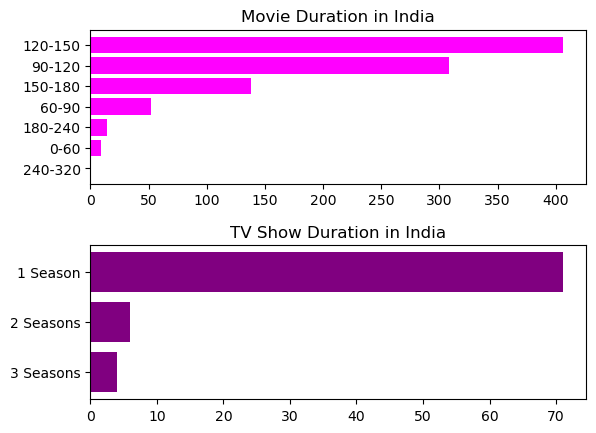

In [142]:
fig, (ax1,ax2) = plt.subplots(2,1)

#INDIA MOVIE DURATION

df_ind_movies_duration=df_ind_movies.groupby(['duration']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)
ax1.barh(df_ind_movies_duration['duration'][::-1],df_ind_movies_duration['title'][::-1],color='magenta')
ax1.set_title('Movie Duration in India')

#INDIA TV SHOW DURATION

df_ind_tv_duration=df_ind_tv.groupby(['duration']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax2.barh(df_ind_tv_duration['duration'][::-1],df_ind_tv_duration['title'][::-1],color='purple')
ax2.set_title('TV Show Duration in India')

plt.subplots_adjust(hspace=0.4)

- Most popular movie duration for Indian audiences were around 120 - 150 mins and as for TV shows the audience opted for series with fewer number of seasons, although the maximum number were only upto 3 seasons

In [143]:
df_ind_movie_date=df_date_movies[df_date_movies['Country']=='India'].reset_index()
df_ind_tv_date=df_date_tv[df_date_tv['Country']=='India'].reset_index()

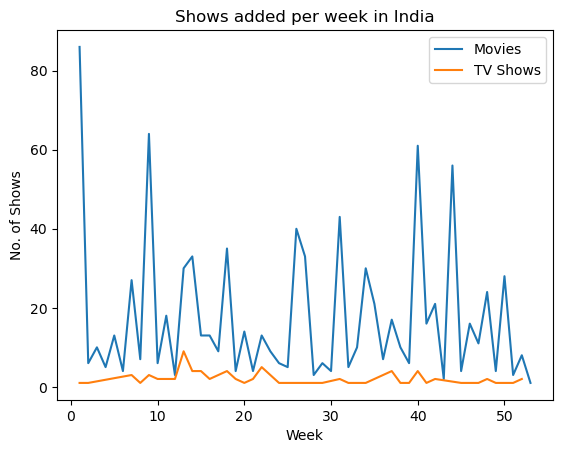

In [144]:
#SHOWS ADDED TO THE PLATFORM PER WEEK IN INDIA

df_ind_week_movie=df_ind_movie_date.groupby(['added_week']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_ind_week_tv=df_ind_tv_date.groupby(['added_week']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_ind_week_movie, x='added_week', y='title')
sns.lineplot(data=df_ind_week_tv, x='added_week', y='title')
plt.title('Shows added per week in India')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Week")
plt.show()


- Movies are mostly added to the platform at the starting weeks of an year and whereas TV shows were added mostly towards the middle weeks of an year. However the trend follows in a zigzag fasion
- The amount of Movies added per week are much higher than that of the TV shows

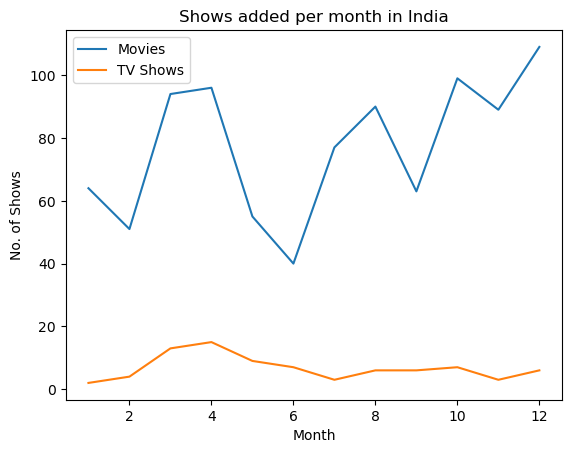

In [145]:
#SHOWS ADDED TO THE PLATFORM PER MONTH IN THE INDIA

df_ind_month_movie=df_ind_movie_date.groupby(['added_month']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_ind_month_tv=df_ind_tv_date.groupby(['added_month']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_ind_month_movie, x='added_month', y='title')
sns.lineplot(data=df_ind_month_tv, x='added_month', y='title')
plt.title('Shows added per month in India')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Month")
plt.show()


- Most Movies were added in during beginning of the each month whereas TV Shows are added in Netflix by large amounts in March, April, July, November and December for India
- The amount of Movies added per month are much higher than that of the TV shows

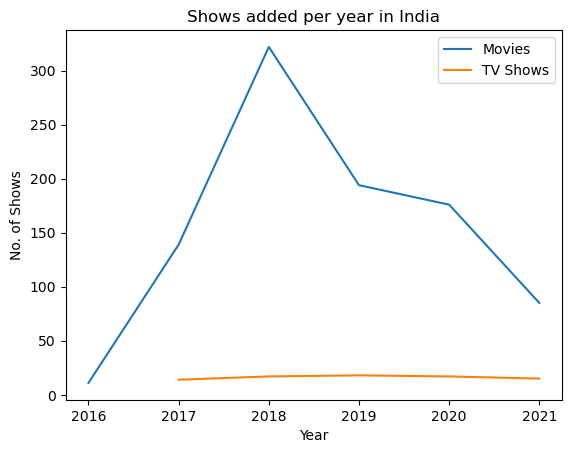

In [146]:
#SHOWS ADDED TO THE PLATFORM PER YEAR IN INDIA

df_ind_year_movie=df_ind_movie_date.groupby(['added_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_ind_year_tv=df_ind_tv_date.groupby(['added_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_ind_year_movie, x='added_year', y='title')
sns.lineplot(data=df_ind_year_tv, x='added_year', y='title')
plt.title('Shows added per year in India')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Year")
plt.show()


- The obsvervable trend amongst movies and TV Shows across India in Netflix is the reduction of movies towards 2020
- The amount of Movies added per year for India significantly much higher than that of the TV shows
- TV Shows have started to add in Netflix platform only after the year 2017

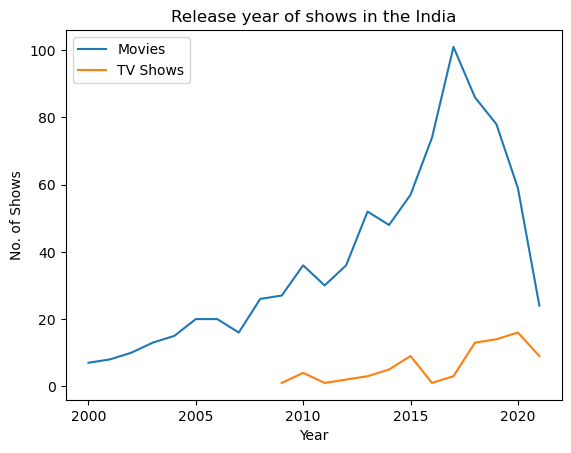

In [147]:
#ACTUAL RELEASE YEAR OF MOVIES AND TV SHOWS IN INDIA

df_ind_Ryear_movie=df_ind_movie_date.groupby(['release_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_ind_Ryear_movie=df_ind_Ryear_movie[df_ind_Ryear_movie['release_year']>=2000]

df_ind_Ryear_tv=df_ind_tv_date.groupby(['release_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_ind_Ryear_tv=df_ind_Ryear_tv[df_ind_Ryear_tv['release_year']>=1980]

sns.lineplot(data=df_ind_Ryear_movie, x='release_year', y='title')
sns.lineplot(data=df_ind_Ryear_tv, x='release_year', y='title')
plt.title('Release year of shows in the India')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Year")
plt.show()


- The gradual increase in number of released TV shows across the year, even after its late entry point is observed until 2020
- In India, both number of released Movies and Shows have reduced after 2020. However the amount of decrease in number of TV Shows were small as compared to Movies
- The amount of Movies released per year for India significantly much higher than that of the TV shows

In [148]:
df_ind_movie_director_actor=df_ind_movies.groupby(['Directors','Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_ind_movie_director_actor=df_ind_movie_director_actor[df_ind_movie_director_actor['Directors']!='Unknown Director']
df_ind_movie_director_actor=df_ind_movie_director_actor[df_ind_movie_director_actor['Actors']!='Unknown Director']

df_ind_movie_director_actor['Actors combined with Directors'] = df_ind_movie_director_actor.Actors.str.cat(df_ind_movie_director_actor.Directors, sep=' - ')
df_ind_movie_director_actor

,Directors,Actors,title,Actors combined with Directors
1840,David Dhawan,Anupam Kher,6,Anupam Kher - David Dhawan
6219,Sooraj R. Barjatya,Alok Nath,5,Alok Nath - Sooraj R. Barjatya
4797,Rajiv Chilaka,Julie Tejwani,4,Julie Tejwani - Rajiv Chilaka
6235,Sooraj R. Barjatya,Mohnish Bahl,4,Mohnish Bahl - Sooraj R. Barjatya
4440,Priyadarshan,Rajpal Yadav,4,Rajpal Yadav - Priyadarshan
...,...,...,...,...
2446,Imtiaz Ali,Kavi Shastri,1,Kavi Shastri - Imtiaz Ali
2445,Imtiaz Ali,Kareena Kapoor,1,Kareena Kapoor - Imtiaz Ali
2444,Imtiaz Ali,Kamal Tiwari,1,Kamal Tiwari - Imtiaz Ali
2443,Imtiaz Ali,Javed Sheikh,1,Javed Sheikh - Imtiaz Ali


In [149]:
df_ind_tv_director_actor=df_ind_tv.groupby(['Directors','Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_ind_tv_director_actor=df_ind_tv_director_actor[df_ind_tv_director_actor['Directors']!='Unknown Director']
df_ind_tv_director_actor=df_ind_tv_director_actor[df_ind_tv_director_actor['Actors']!='Unknown Director']

df_ind_tv_director_actor['Actors combined with Directors'] = df_ind_tv_director_actor.Actors.str.cat(df_ind_tv_director_actor.Directors, sep=' - ')
df_ind_tv_director_actor

,Directors,Actors,title,Actors combined with Directors
45,Gautham Vasudev Menon,Anjali,2,Anjali - Gautham Vasudev Menon
52,Gautham Vasudev Menon,Gautham Vasudev Menon,2,Gautham Vasudev Menon - Gautham Vasudev Menon
60,Gautham Vasudev Menon,Prakash Raj,2,Prakash Raj - Gautham Vasudev Menon
0,Anurag Kashyap,Jitendra Joshi,1,Jitendra Joshi - Anurag Kashyap
327,Tharun Bhascker Dhaassyam,Satya Dev,1,Satya Dev - Tharun Bhascker Dhaassyam
...,...,...,...,...
218,Vasanth Sai,Aditi Balan,1,Aditi Balan - Vasanth Sai
219,Vasanth Sai,Anjali,1,Anjali - Vasanth Sai
220,Vasanth Sai,Arvind Swamy,1,Arvind Swamy - Vasanth Sai
221,Vasanth Sai,Ashok Selvan,1,Ashok Selvan - Vasanth Sai


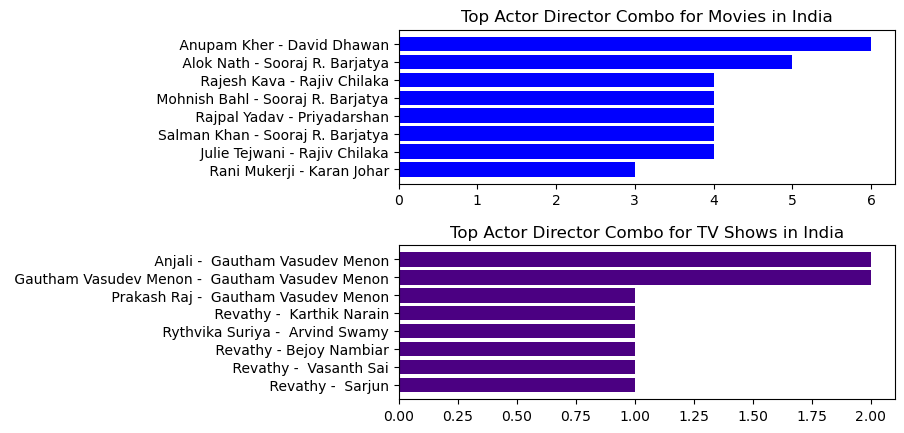

In [150]:
fig, (ax1,ax2) = plt.subplots(2,1)

#INDIA MOVIE BEST ACTOR - DIRECTOR COMBINATION

df_ind_m_actor_director=df_ind_movie_director_actor.groupby(['Actors combined with Directors']).aggregate({'title':'sum'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax1.barh(df_ind_m_actor_director['Actors combined with Directors'][::-1],df_ind_m_actor_director['title'][::-1],color='blue')
ax1.set_title('Top Actor Director Combo for Movies in India')

#INDIA TV SHOW BEST ACTOR - DIRECTOR COMBINATION

df_ind_t_actor_director=df_ind_tv_director_actor.groupby(['Actors combined with Directors']).aggregate({'title':'sum'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax2.barh(df_ind_t_actor_director['Actors combined with Directors'][::-1],df_usa_t_actor_director['title'][::-1],color='indigo')
ax2.set_title('Top Actor Director Combo for TV Shows in India')

plt.subplots_adjust(hspace=0.4)

Top 5 **Actor - Director** Combo in Movies Across **India** :
- Anupam Kher - David Dhawan
- Alok Nath - Sooraj R. Barjatya
- Rajesh Kava - Rajiv Chilaka
- Mohinish Bahl - Sooraj R. Barjatya
- Rajpal Yadav - Priyadarshan

Top 5 **Actor - Director** Combo in TV Shows Across **India** :
- Anjali - Gautham Vasudeva Menon
- Gautham Vasudeva Menon - Gautham Vasudeva Menon
- Prakash Raj - Gautham Vasudeva Menon
- Revathy - Karthik Narain
- Rythvika Suriya - Arvind Swamy

#### Conclusion for visual analysis of data for India
- The number of movies released in the India per year is very high compared to that of TV shows across the platform
- The number of added Movies and TV shows have reduced steadily after 2020 pertaining to COVID 19 scenario
- The TV shows in India has only started its way around the year 2008 and has picked up momentum very quickly
- Most of the movies and TV shows released on Netflix for India are targeted towards teens and then mature audiences
- Internatinal movies, International TV shows, Drama etc., are the popular genre among Indian audiences
- Anupam Kher & SRK are among the top popular actors for movies and Nishka Raheja & Rajesh Kava for TV shows
- The Indian audience engagement were highest at duration between 120 - 150 mins for movies, and single season for TV shows
- There has been only instances of TV shows with maximum of 3 seasons in India across platform
- Gautham Vasudeva Menon is most popoular among TV shows as both actor and director

### Visual Analysis of Movies and TV shows for Japan

In [151]:
df_jp_movies=df_movies[df_movies['Country']=='Japan'].reset_index()
df_jp_tv=df_tvshow[df_tvshow['Country']=='Japan'].reset_index()

C:\Users\rrosh\AppData\Local\Temp\ipykernel_7460\1539303752.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jp_movies_actors=df_jp_movies_actors[df_jp_movies['Actors']!='Unknown Actor']


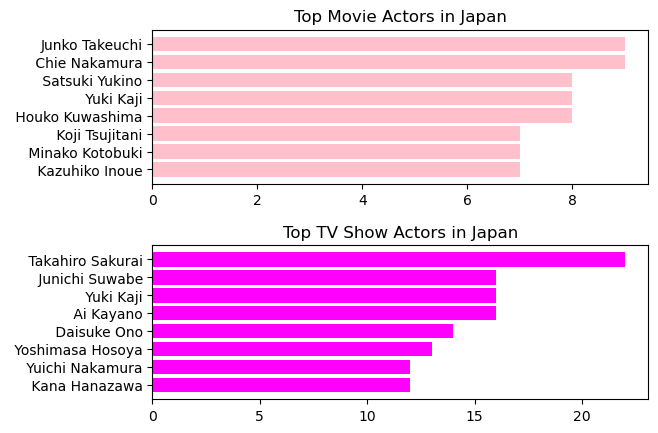

In [152]:
fig, (ax1,ax2) = plt.subplots(2,1)

#JAPAN MOVIE ACTORS

df_jp_movies_actors=df_jp_movies.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_jp_movies_actors=df_jp_movies_actors[df_jp_movies['Actors']!='Unknown Actor']
ax1.barh(df_jp_movies_actors['Actors'][::-1],df_jp_movies_actors['title'][::-1],color='pink')
ax1.set_title('Top Movie Actors in Japan')

#JAPAN TV SHOW ACTORS

df_jp_tv_actors=df_jp_tv.groupby(['Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_jp_tv_actors=df_jp_tv_actors[df_jp_tv_actors['Actors']!='Unknown Actor']
ax2.barh(df_jp_tv_actors['Actors'][::-1],df_jp_tv_actors['title'][::-1],color='magenta')
ax2.set_title('Top TV Show Actors in Japan')

plt.subplots_adjust(hspace=0.4)

Top 5 **Actors** in Movies Across **Japan** :

- Junko Takeuchi
- Chie Nakamura
- Satsuki Yukino
- Yuki Kaji
- Houko Kuwashima

Top 5 **Actors** in TV Shows Across **Japan** :

- Takehiro Sakurai
- Junichi Suwabe
- Ai Kayano
- Daisuke Ono
- Yoshimasa Hosoya

#### It can be noted that the number of shows the actors has been part of, is significantly higher for TV shows than that of movies

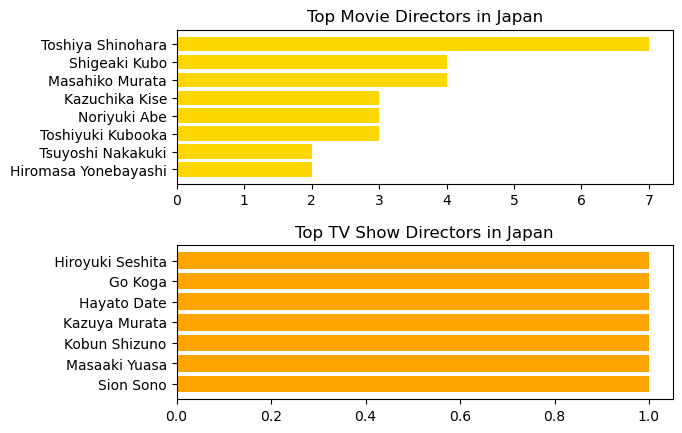

In [153]:
fig, (ax1,ax2) = plt.subplots(2,1)

#JAPAN MOVIE DIRECTORS

df_jp_movies_directors=df_jp_movies.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_jp_movies_directors=df_jp_movies_directors[df_jp_movies_directors['Directors']!='Unknown Director']
ax1.barh(df_jp_movies_directors['Directors'][::-1],df_jp_movies_directors['title'][::-1],color='gold')
ax1.set_title('Top Movie Directors in Japan')

#JAPAN TV SHOW DIRECTORS

df_jp_tv_directors=df_jp_tv.groupby(['Directors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
df_jp_tv_directors=df_jp_tv_directors[df_jp_tv_directors['Directors']!='Unknown Director']
ax2.barh(df_jp_tv_directors['Directors'][::-1],df_jp_tv_directors['title'][::-1],color='orange')
ax2.set_title('Top TV Show Directors in Japan')

plt.subplots_adjust(hspace=0.4)

Top 5 **Directors** for Movies Across **Japan** :

- Toshiya Shinohara
- Shigeki Kubo
- Mashiko Murata
- Kasuchika Kise
- Noruyuki Abe

Top 5 **Directors** for TV Shows Across **Japan** :

- Hireyuki Seshita
- Go Koga
- Hayato Date
- Kazuna Murata
- Kobun Shizuno

#### It can be noted from the number of directors for TV shows that, all directors are one time directors only

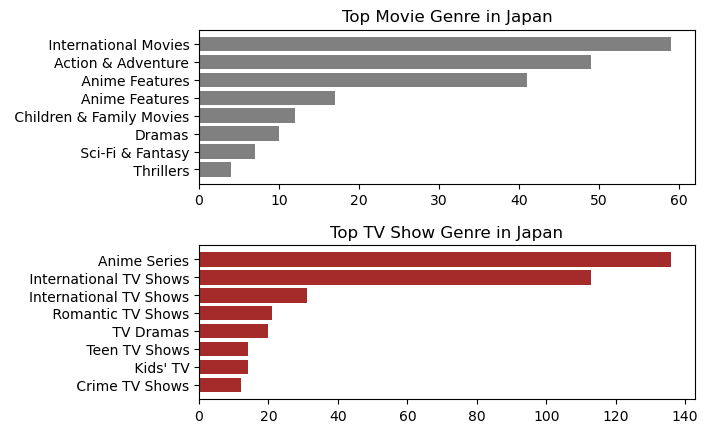

In [154]:
fig, (ax1,ax2) = plt.subplots(2,1)

#JAPAN MOVIE GENRE

df_jp_movies_genre=df_jp_movies.groupby(['Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax1.barh(df_jp_movies_genre['Genre'][::-1],df_jp_movies_genre['title'][::-1],color='grey')
ax1.set_title('Top Movie Genre in Japan')

#JAPAN TV SHOW GENRE

df_jp_tv_genre=df_jp_tv.groupby(['Genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax2.barh(df_jp_tv_genre['Genre'][::-1],df_jp_tv_genre['title'][::-1],color='brown')
ax2.set_title('Top TV Show Genre in Japan')

plt.subplots_adjust(hspace=0.4)

Top 5 **genre** among Movies Across **Japan** :

- International Movies
- Action & Adventure
- Anime Features
- Children & Family Movies
- Dramas

Top 5 **genre** among TV Shows Across **Japan** :

- Anime Series
- International TV Shows
- Romantic TV Shows
- TV Dramas
- Teen TV Shows

#### Number of TV shows is significantly higher for than that of movies and Anime Series and International movies are very popular in Japan

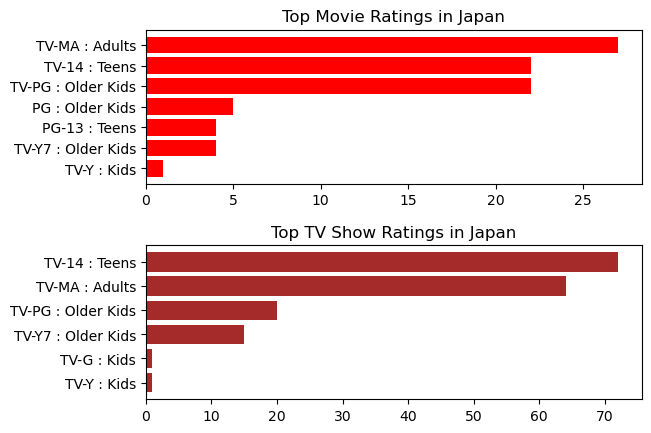

In [155]:
fig, (ax1,ax2) = plt.subplots(2,1)

#JAPAN MOVIE RATING

df_jp_movies_rating=df_jp_movies.groupby(['rating']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:7]
ax1.barh(df_jp_movies_rating['rating'][::-1],df_jp_movies_rating['title'][::-1],color='red')
ax1.set_title('Top Movie Ratings in Japan')

#JAPAN TV SHOW RATING

df_jp_tv_rating=df_jp_tv.groupby(['rating']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
ax2.barh(df_jp_tv_rating['rating'][::-1],df_jp_tv_rating['title'][::-1],color='brown')
ax2.set_title('Top TV Show Ratings in Japan')

plt.subplots_adjust(hspace=0.4)

- We can conclude that the popular ratings across Netflix for Japan includes TV-14 and for Mature Audiences in for both movies and TV shows

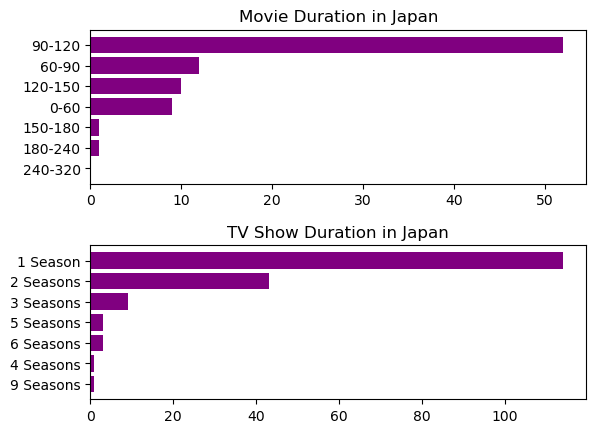

In [156]:
fig, (ax1,ax2) = plt.subplots(2,1)

#JAPAN MOVIE DURATION

df_jp_movies_duration=df_jp_movies.groupby(['duration']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)
ax1.barh(df_jp_movies_duration['duration'][::-1],df_jp_movies_duration['title'][::-1],color='purple')
ax1.set_title('Movie Duration in Japan')

#JAPAN TV SHOW DURATION

df_jp_tv_duration=df_jp_tv.groupby(['duration']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:8]
ax2.barh(df_jp_tv_duration['duration'][::-1],df_jp_tv_duration['title'][::-1],color='purple')
ax2.set_title('TV Show Duration in Japan')

plt.subplots_adjust(hspace=0.4)

- Most popular movie duration for Japan audiences were around 90 - 120 mins and as for TV shows the Japanese audience opted for series with fewer number of seasons

In [157]:
df_jp_movie_date=df_date_movies[df_date_movies['Country']=='Japan'].reset_index()
df_jp_tv_date=df_date_tv[df_date_tv['Country']=='Japan'].reset_index()

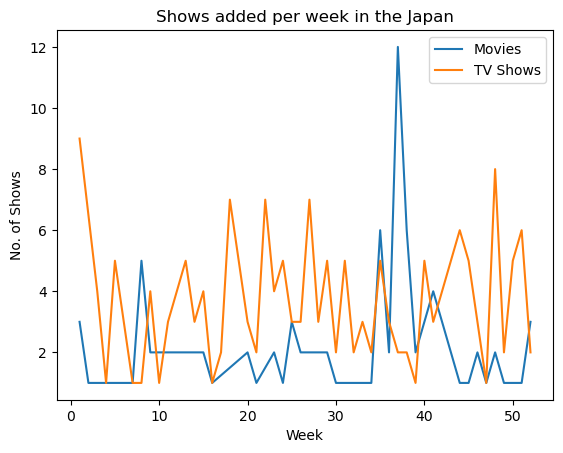

In [158]:
#SHOWS ADDED TO THE PLATFORM PER WEEK INJAPAN

df_jp_week_movie=df_jp_movie_date.groupby(['added_week']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_jp_week_tv=df_jp_tv_date.groupby(['added_week']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_jp_week_movie, x='added_week', y='title')
sns.lineplot(data=df_jp_week_tv, x='added_week', y='title')
plt.title('Shows added per week in the Japan')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Week")
plt.show()


- In Japan, the number of movies and TV shows added per week almost follows the zigzag pattern
- The number of TV shows added per week is visibly higher than that of movies, however there was a peak at around August for movies in Japan

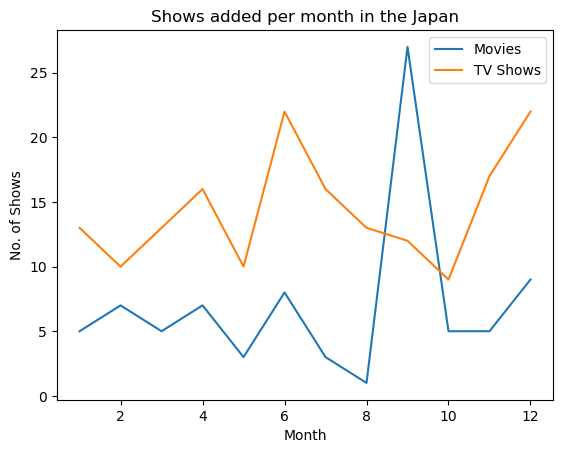

In [159]:
#SHOWS ADDED TO THE PLATFORM PER MONTH IN JAPAN

df_jp_month_movie=df_jp_movie_date.groupby(['added_month']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_jp_month_tv=df_jp_tv_date.groupby(['added_month']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_jp_month_movie, x='added_month', y='title')
sns.lineplot(data=df_jp_month_tv, x='added_month', y='title')
plt.title('Shows added per month in the Japan')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Month")
plt.show()


- Number of TV shows added per month is higher than that of the movies in Japan with highest values between June - July month
- There is a peak between months August - October for movies 
- Number of both shows added per month are in a upward trend towards month of December

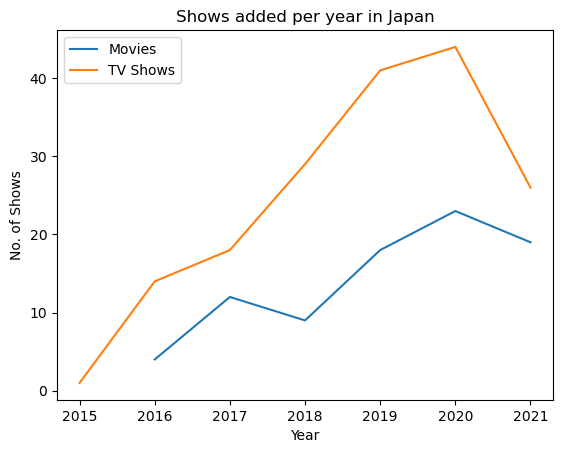

In [168]:
#SHOWS ADDED TO THE PLATFORM PER YEAR IN JAPAN

df_jp_year_movie=df_jp_movie_date.groupby(['added_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_jp_year_tv=df_jp_tv_date.groupby(['added_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)

sns.lineplot(data=df_jp_year_movie, x='added_year', y='title')
sns.lineplot(data=df_jp_year_tv, x='added_year', y='title')
plt.title('Shows added per year in Japan')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Year")
plt.show()


- Number of TV shows added per year is higher than that of the movies in Japan across the platform
- Number of both shows added per yer are in a downward trend towards the year 2021 from 2020 for both movies and TV shows

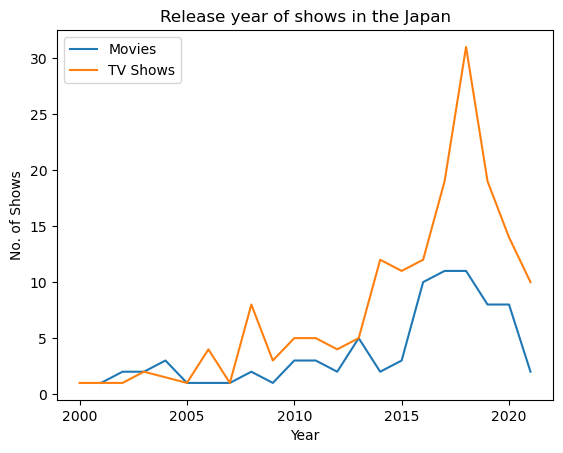

In [167]:
#ACTUAL RELEASE YEAR OF MOVIES AND TV SHOWS IN JAPAN

df_jp_Ryear_movie=df_jp_movie_date.groupby(['release_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_jp_Ryear_movie=df_jp_Ryear_movie[df_jp_Ryear_movie['release_year']>=2000]

df_jp_Ryear_tv=df_jp_tv_date.groupby(['release_year']).aggregate({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_jp_Ryear_tv=df_jp_Ryear_tv[df_jp_Ryear_tv['release_year']>=2000]

sns.lineplot(data=df_jp_Ryear_movie, x='release_year', y='title')
sns.lineplot(data=df_jp_Ryear_tv, x='release_year', y='title')
plt.title('Release year of shows in the Japan')
plt.legend(['Movies','TV Shows'])
plt.ylabel("No. of Shows")
plt.xlabel("Year")
plt.show()


- It can be clearly observed that after 2005, the no of TV shows released per year is always higher than that of the movies
- However, after 2020 the number of released movies follows a downward trend towards 2021

In [162]:
df_jp_movie_director_actor=df_jp_movies.groupby(['Directors','Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_jp_movie_director_actor=df_jp_movie_director_actor[df_jp_movie_director_actor['Directors']!='Unknown Director']
df_jp_movie_director_actor=df_jp_movie_director_actor[df_jp_movie_director_actor['Actors']!='Unknown Director']

df_jp_movie_director_actor['Actors combined with Directors'] = df_jp_movie_director_actor.Actors.str.cat(df_jp_movie_director_actor.Directors, sep=' - ')
df_jp_movie_director_actor

,Directors,Actors,title,Actors combined with Directors
719,Toshiya Shinohara,Houko Kuwashima,7,Houko Kuwashima - Toshiya Shinohara
724,Toshiya Shinohara,Koji Tsujitani,7,Koji Tsujitani - Toshiya Shinohara
725,Toshiya Shinohara,Kumiko Watanabe,7,Kumiko Watanabe - Toshiya Shinohara
732,Toshiya Shinohara,Satsuki Yukino,7,Satsuki Yukino - Toshiya Shinohara
735,Toshiya Shinohara,Kappei Yamaguchi,7,Kappei Yamaguchi - Toshiya Shinohara
...,...,...,...,...
297,Hirotsugu Kawasaki,Chie Nakamura,1,Chie Nakamura - Hirotsugu Kawasaki
298,Hirotsugu Kawasaki,Gamon Kaai,1,Gamon Kaai - Hirotsugu Kawasaki
299,Hirotsugu Kawasaki,Houko Kuwashima,1,Houko Kuwashima - Hirotsugu Kawasaki
300,Hirotsugu Kawasaki,Sachiko Kojima,1,Sachiko Kojima - Hirotsugu Kawasaki


In [163]:
df_jp_tv_director_actor=df_jp_tv.groupby(['Directors','Actors']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_jp_tv_director_actor=df_jp_tv_director_actor[df_jp_tv_director_actor['Directors']!='Unknown Director']
df_jp_tv_director_actor=df_jp_tv_director_actor[df_jp_tv_director_actor['Actors']!='Unknown Director']

df_jp_tv_director_actor['Actors combined with Directors'] = df_jp_tv_director_actor.Actors.str.cat(df_jp_tv_director_actor.Directors, sep=' - ')
df_jp_tv_director_actor

,Directors,Actors,title,Actors combined with Directors
0,Hiroyuki Seshita,Daisuke Ono,1,Daisuke Ono - Hiroyuki Seshita
1154,Yasuhiro Irie,Biichi Sato,1,Biichi Sato - Yasuhiro Irie
1155,Yasuhiro Irie,Fumiko Orikasa,1,Fumiko Orikasa - Yasuhiro Irie
1156,Yasuhiro Irie,Hidekatsu Shibata,1,Hidekatsu Shibata - Yasuhiro Irie
1157,Yasuhiro Irie,Hiroyuki Yoshino,1,Hiroyuki Yoshino - Yasuhiro Irie
...,...,...,...,...
87,Tensai Okamura,Asami Seto,1,Asami Seto - Tensai Okamura
88,Tensai Okamura,Hikaru Ueda,1,Hikaru Ueda - Tensai Okamura
89,Tensai Okamura,Kaito Ishikawa,1,Kaito Ishikawa - Tensai Okamura
1,Hiroyuki Seshita,Junichi Suwabe,1,Junichi Suwabe - Hiroyuki Seshita


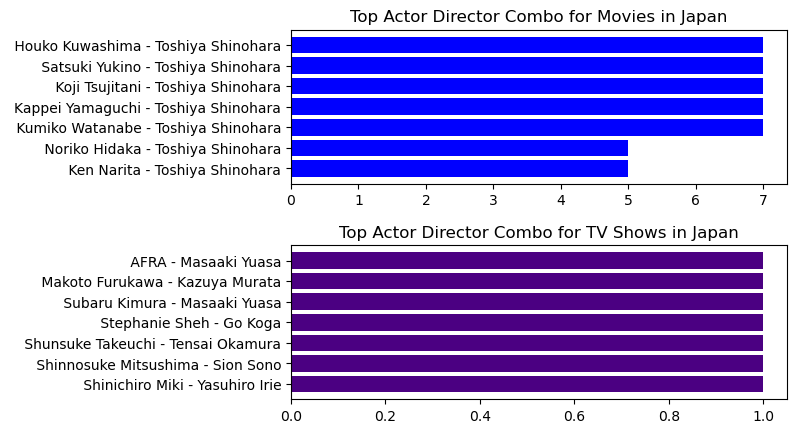

In [185]:
fig, (ax1,ax2) = plt.subplots(2,1)

#JAPAN MOVIE BEST ACTOR - DIRECTOR COMBINATION

df_jp_m_actor_director=df_jp_movie_director_actor.groupby(['Actors combined with Directors']).aggregate({'title':'sum'}).reset_index().sort_values(by=['title'], ascending=False)[:7]
ax1.barh(df_jp_m_actor_director['Actors combined with Directors'][::-1],df_jp_m_actor_director['title'][::-1],color='blue')
ax1.set_title('Top Actor Director Combo for Movies in Japan')

#JAPAN TV SHOW BEST ACTOR - DIRECTOR COMBINATION

df_jp_t_actor_director=df_jp_tv_director_actor.groupby(['Actors combined with Directors']).aggregate({'title':'sum'}).reset_index().sort_values(by=['title'], ascending=False)[:7]
ax2.barh(df_jp_t_actor_director['Actors combined with Directors'][::-1],df_jp_t_actor_director['title'][::-1],color='indigo')
ax2.set_title('Top Actor Director Combo for TV Shows in Japan')

plt.subplots_adjust(hspace=0.4)

Top 5 **Actor - Director** Combo in Movies Across **Japan** :
- Houko Kuwashima - Toshiya Shinohara
- Satsuki Yukino - Toshiya Shinohara
- Koji Tsujitani - Toshiya Shinohara
- Kappei Yamaguchi - Toshiya Shinohara
- Kumiki Watanabe - Toshiya Shinohara

Top 5 **Actor - Director** Combo in TV Shows Across **Japan** :
- AFRA - Masaaki Yuasa
- Makoto Furukawa -Kazuya Murata
- Subaru Kimura - Masaaki Yuasa
- Stephanie Sheh - Go Koga
- Shunsuke Takeukchi - Tensai Okamura

#### It can be noted that, since all directors were one time only for TV shows, the Actor - Director combos were also unique for Japan. In the case of movies in Japan, Toshiya Shinohara is found to be popular among the directors

#### Conclusion for visual analysis of data for Japan
- For Japan, TV shows released per year is high compared to that of movies across the platform
- The number of added Movies and TV shows have reduced steadily after 2020 due to COVID 19 scenario
- The release of movies during Aug - Oct months has shown peak performance than TV shows
- Most of the movies and TV shows released on Netflix for Japan are targeted towards teens and then mature audiences
- Anime series, International movies, Action etc., are the popular genre among Japanese audiences
- For TV shows in Japan, all directors are one time directors only across the platform
- Junko Takeuchi & Chie NakamuraK are among the top popular actors for movies and Takehiro Sakurai & Junichi Suwabe for TV shows
- The Japanese audience engagement were highest at duration between 90 - 120 mins for movies, and single season for TV shows
- Toshiya Shinohara is found to be popular director among the actors in Japan

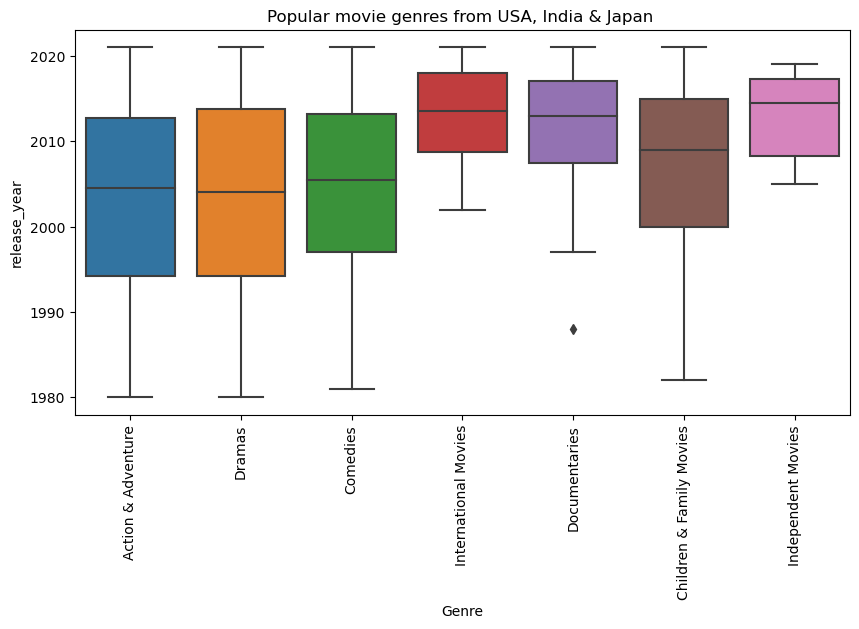

In [187]:
df_fm=df_movies[(df_movies['Country']=='United States')|(df_movies['Country']=='India')|(df_movies['Country']=='Japan')]
df_fm=df_fm[(df_fm['Genre']=='International Movies')|(df_fm['Genre']=='Dramas')|(df_fm['Genre']=='Children & Family Movies')|(df_fm['Genre']=='Independent Movies')|(df_fm['Genre']=='Comedies')|(df_fm['Genre']=='Documentaries')|(df_fm['Genre']=='Action & Adventure')]
dm_fi=df_fm.groupby(['Country','release_year'])['Genre'].value_counts().to_frame('count').reset_index()
dm_fi=dm_fi[dm_fi['release_year']>=1980]

plt.figure(figsize=(10,5))
sns.boxplot(x = 'Genre', y = 'release_year', data = dm_fi)
plt.title('Popular movie genres from USA, India & Japan ')
plt.xticks(rotation=90)
plt.show()


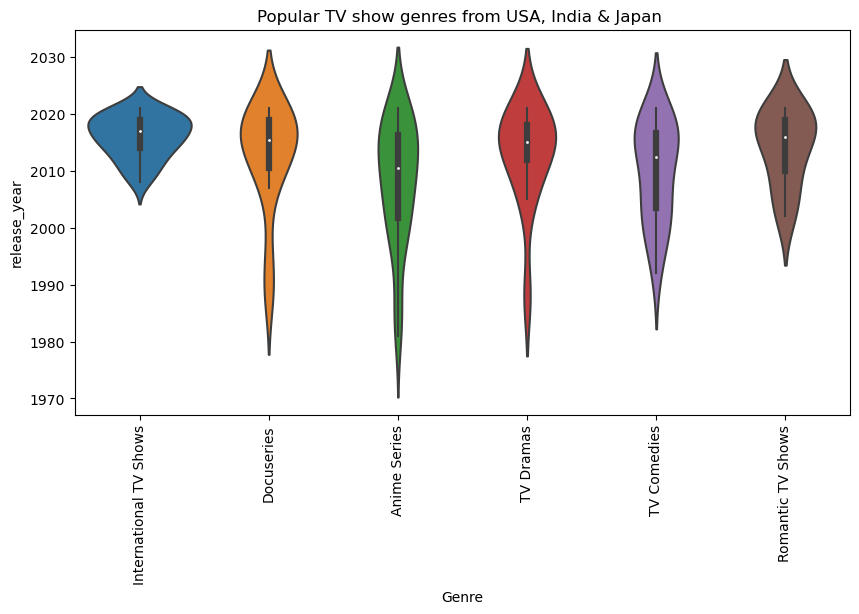

In [166]:
df_ft=df_tvshow[(df_tvshow['Country']=='United States')|(df_tvshow['Country']=='India')|(df_tvshow['Country']=='Japan')]
df_ft=df_ft[(df_ft['Genre']=='Anime Series')|(df_ft['Genre']=='International TV Shows')|(df_ft['Genre']=='TV Dramas')|(df_ft['Genre']=='TV Comedies')|(df_ft['Genre']=='Romantic TV Shows')|(df_ft['Genre']=='Docuseries')]
dm_fin=df_ft.groupby(['Country','release_year'])['Genre'].value_counts().to_frame('count').reset_index()
dm_fin=dm_fin[dm_fin['release_year']>=1980]

plt.figure(figsize=(10,5))
sns.violinplot(x = 'Genre', y = 'release_year', data = dm_fin)
plt.title('Popular TV show genres from USA, India & Japan ')
plt.xticks(rotation=90)
plt.show()

#### Conclusions from analysis of data for USA, India and Japan

- TV shows are more popular movies in Japan, where as in USA and India movies are more popular
- Duration of popular movies in India is longer (120-150 mins) than that of both USA and Japan (90-120 mins)
- All three countries prefer TV shows with fewer number of seasons
- International movies/TV shows, Comedies and Dramas are popular in each country
- In Japan, Anime is the most popular among both movies & TV shows
- The target audience of USA is mostly adults and then teens, while that for Japan & India were teens
- For Japan, each directors of the TV shows were unique, while different for USA & India
- In India, introduction of TV shows came after 2008 as for the others it were available form the 2000's
- The number of both movies and TV shows are following a downward trend after 2020 for each country


## Overall Conclusion
### Insights and Recommendation
- Almost 70% of the Shows in Netflix are Movies. Most views prefer Movies in worldwide
- Most movie releasing countries in Netflix are English speaking countries such as United states, United Kingdom, Canada etc. Also, English language are more understood worldwide: Therefore Netflix should host more English movies
- They analysis shows a steap upward trend in the release of movies/TV show over the years in the last 3 decades
- Steps need to be taken to flatten the downward trend for number of added content in the platform after the year 2020
- International Movies are most popular genre in Netflix followed by Dramas and comedies. Kids shows are much less available compared to other genres across the platform
- Anupam Kher, Om Puri, Rupa Bhimani, SRK and Paresh Rawal are the top 5 popular actors and Rajiv Chilaka, Raul Campos, Jan Suter, Suhas Kadav and Jay Karas are top 5 popular directors on Netflix across the platform for movies
- United States, India and UK are the top three countries on Netflix based on putting out new movies all around the world
- Most Watched movies on Netflix is having duration between 90 and 120 mins: should focus on putting out more movies having this duration to increase the audience engagement for movies
- In Japan, South Korea and together with some Latin American and European coutries TV shows are found to be more popular than movies: should upload more TV shows in those countries to increase revenue
- Number of TV show release has increased abruptly over the last 2 decades. Most popular TV shows across Netflix has the fewer number of seasons
- Last few decades produced Movies and TV shows based on different type of rating. In recent years content with adult rating are released more which mostly require parental guidance
- Movies/TV shows added on Netflix shows upward trend mostly towards the middle of the year. July month produces more movies/TV shows worldwide per year. July isthe best month for movie release
- There is an increased release of movies generally observed towards end of the year december for India and it also follows a zigzag pattern, in which each peak may represent festive seasons Of India
- Takahiro Sakurai, Yuki Kaji, Junichi Suwabe, Ai Kayano and David Attenborough are the top 5 most popular actors across netflix in TV shows
- United states has most number of the directors followed by India at second. Variety genres of contents are available from these countries across the platform
- Ken Burns, Alastair Fothergill, Rob Seindenglanz are top 3 among the directors of TV shows across and USA, UK, Japan, South Korea and Canada are top 5 popular countries among the Netflix TV shows
- In India and worldwide Anupam Kher is the most movie actor followed by Om Puri in second: we can mostly recommend their movies to indians as well as viewers from other countries
- The TV shows in India has only started its way around the year 2008 and has picked up momentum very quickly. There has been only instances of TV shows with maximum of 3 seasons in India across platform. Gautham Vasudeva Menon is most popoular among TV shows as both actor and director
- The Indian audience engagement were highest at duration between 120 - 150 mins for movies, and single season for TV shows. There has been only instances of TV shows with maximum 3 seasons in India.
- Top collaborations between actor and directors for both movies and TV shows in the USA were with comedy performers Kevin Hart and Dave Chappelle
- Since all directors were one time only for TV shows in Japan, the Actor - Director combos were also unique for Japan. Toshiya Shinohara is found to be popular among the directors
 